In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
from sklearn.metrics import roc_auc_score,roc_curve
import seaborn as sns
import time 

In [2]:
df = pd.read_csv("spamTrain1.csv", header=None)
df_val = pd.read_csv("spamTrain2.csv", header=None)

In [3]:
df

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0.0000,0.0000,0.0,0.0014,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,...,0.0,0.0,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0029,1
1,0.0000,0.0000,0.0,0.0031,-1.0000,0.0,0.0000,-1.0000,0.0000,0.0000,...,0.0,0.0,0.0000,0.0,0.0,0.0,0.0000,0.0031,0.0094,1
2,0.0000,-1.0000,0.0,0.0045,-1.0000,0.0,0.0000,0.0159,0.0000,0.0022,...,-1.0,0.0,0.0088,0.0,0.0,0.0,-1.0000,0.0102,0.0011,1
3,0.0000,0.0050,0.0,-1.0000,0.0000,0.0,-1.0000,0.0000,0.0000,0.0000,...,0.0,0.0,-1.0000,0.0,0.0,0.0,0.0000,0.0000,0.0133,1
4,0.0100,0.0000,0.0,0.0000,0.0000,-1.0,0.0125,0.0000,0.0000,0.0000,...,0.0,0.0,0.0093,0.0,0.0,0.0,0.0000,0.0000,0.0000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,-1.0000,0.0000,-1.0,0.0121,0.0000,0.0,0.0000,0.0000,-1.0000,0.0243,...,0.0,0.0,0.0000,0.0,0.0,0.0,0.0000,0.0060,0.0000,1
1496,0.0091,0.0033,0.0,0.0000,0.0091,-1.0,0.0000,0.0000,0.0000,0.0000,...,-1.0,0.0,-1.0000,-1.0,-1.0,0.0,0.0000,0.0000,0.0000,0
1497,0.0000,-1.0000,0.0,-1.0000,0.0000,0.0,-1.0000,0.0000,0.0000,0.0000,...,0.0,-1.0,0.0000,-1.0,0.0,0.0,0.0000,-1.0000,0.0000,0
1498,0.0000,-1.0000,0.0,-1.0000,0.0000,0.0,0.0000,0.0000,0.0000,-1.0000,...,0.0,-1.0,0.0000,0.0,0.0,-1.0,0.0000,0.0000,0.0188,0


In [4]:
df_val

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0.0,0.0000,0.0,-1.0000,0.0000,-1.0,-1.0000,0.0000,0.0,0.0000,...,-1.0,-1.0,0.0000,0.0,0.0,0.0,-1.0,-1.0000,0.0000,0
1,0.0,0.0000,0.0,-1.0000,0.0000,-1.0,0.0000,0.0000,0.0,0.0000,...,-1.0,0.0,-1.0000,0.0,0.0,-1.0,0.0,0.0000,0.0000,0
2,0.0,-1.0000,0.0,0.0000,0.0000,0.0,0.0000,-1.0000,0.0,-1.0000,...,0.0,0.0,0.0101,-1.0,0.0,0.0,0.0,0.0000,0.0000,0
3,0.0,0.0024,-1.0,0.0036,0.0000,0.0,0.0072,0.0000,0.0,0.0000,...,0.0,0.0,0.0000,0.0,0.0,-1.0,0.0,0.0000,0.0036,0
4,0.0,0.0000,0.0,0.0000,0.0000,0.0,0.0000,0.0000,0.0,0.0000,...,0.0,0.0,-1.0000,-1.0,0.0,-1.0,-1.0,0.0000,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0.0,0.0037,0.0,-1.0000,-1.0000,0.0,0.0000,0.0000,-1.0,0.0000,...,0.0,0.0,0.0000,0.0,-1.0,0.0,-1.0,0.0000,0.0000,0
1496,0.0,-1.0000,0.0,0.0000,0.0000,-1.0,-1.0000,0.0043,0.0,0.0043,...,0.0,0.0,0.0124,-1.0,0.0,-1.0,0.0,0.0043,0.0087,1
1497,0.0,0.0000,-1.0,0.0000,0.0000,-1.0,0.0000,-1.0000,0.0,0.0000,...,0.0,0.0,0.0129,-1.0,0.0,0.0,0.0,0.0000,-1.0000,0
1498,0.0,0.0000,0.0,0.0000,0.0000,0.0,-1.0000,0.0000,0.0,0.0000,...,0.0,0.0,-1.0000,-1.0,0.0,0.0,0.0,0.0000,0.0000,0


<h1>Data Desc</h1>

<p>-1 Implies that the data is missing </p>
<p>Each feature corresponds to a word and denotes the proportion of all words in the email that match the given word</p>


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1500 non-null   float64
 1   1       1500 non-null   float64
 2   2       1500 non-null   float64
 3   3       1500 non-null   float64
 4   4       1500 non-null   float64
 5   5       1500 non-null   float64
 6   6       1500 non-null   float64
 7   7       1500 non-null   float64
 8   8       1500 non-null   float64
 9   9       1500 non-null   float64
 10  10      1500 non-null   float64
 11  11      1500 non-null   float64
 12  12      1500 non-null   float64
 13  13      1500 non-null   float64
 14  14      1500 non-null   float64
 15  15      1500 non-null   float64
 16  16      1500 non-null   float64
 17  17      1500 non-null   float64
 18  18      1500 non-null   float64
 19  19      1500 non-null   float64
 20  20      1500 non-null   float64
 21  21      1500 non-null   float64
 22  

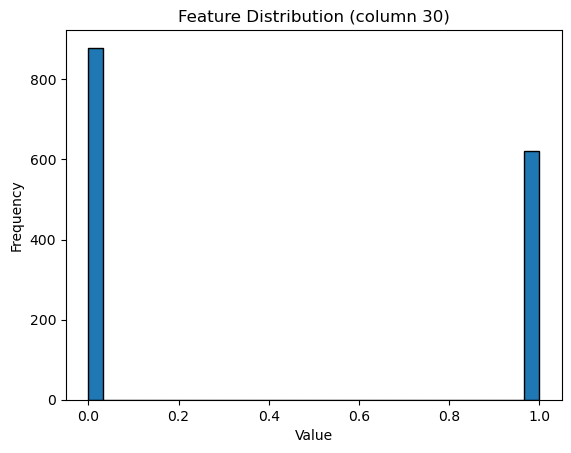

30
0    879
1    621
Name: count, dtype: int64
Percent of Data Labeled 0: 0.586 
Percent of Data Labeled 1: 0.414 
CPU times: total: 531 ms
Wall time: 542 ms


In [6]:
%%time
plt.hist(df[30], bins=30, edgecolor='black')
plt.title('Feature Distribution (column 30)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()
print(df[30].value_counts())
print(f"Percent of Data Labeled 0: {df[30].value_counts()[0] / (df[30].value_counts()[0]+ df[30].value_counts()[1])} ")
print(f"Percent of Data Labeled 1: {df[30].value_counts()[1] / (df[30].value_counts()[0]+ df[30].value_counts()[1])} ")

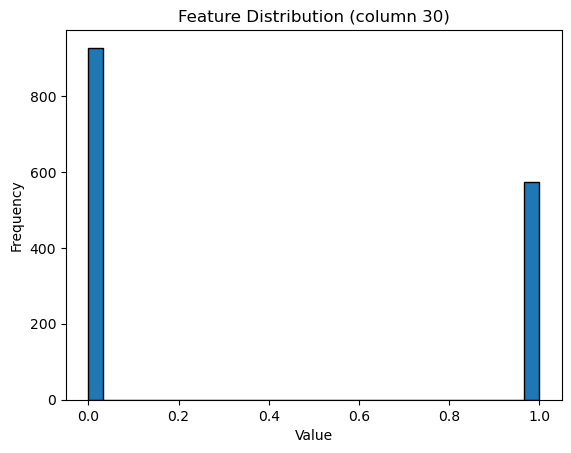

30
0    927
1    573
Name: count, dtype: int64
Percent of Data Labeled 0: 0.618 
Percent of Data Labeled 1: 0.382 


In [7]:
plt.hist(df_val[30], bins=30, edgecolor='black')
plt.title('Feature Distribution (column 30)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()
print(df_val[30].value_counts())
print(f"Percent of Data Labeled 0: {df_val[30].value_counts()[0] / (df_val[30].value_counts()[0]+ df_val[30].value_counts()[1])} ")
print(f"Percent of Data Labeled 1: {df_val[30].value_counts()[1] / (df_val[30].value_counts()[0]+ df_val[30].value_counts()[1])} ")


In [8]:
# Replace all the -1 with nan
#df = df.replace(-1, np.nan)

In [9]:
df

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0.0000,0.0000,0.0,0.0014,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,...,0.0,0.0,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0029,1
1,0.0000,0.0000,0.0,0.0031,-1.0000,0.0,0.0000,-1.0000,0.0000,0.0000,...,0.0,0.0,0.0000,0.0,0.0,0.0,0.0000,0.0031,0.0094,1
2,0.0000,-1.0000,0.0,0.0045,-1.0000,0.0,0.0000,0.0159,0.0000,0.0022,...,-1.0,0.0,0.0088,0.0,0.0,0.0,-1.0000,0.0102,0.0011,1
3,0.0000,0.0050,0.0,-1.0000,0.0000,0.0,-1.0000,0.0000,0.0000,0.0000,...,0.0,0.0,-1.0000,0.0,0.0,0.0,0.0000,0.0000,0.0133,1
4,0.0100,0.0000,0.0,0.0000,0.0000,-1.0,0.0125,0.0000,0.0000,0.0000,...,0.0,0.0,0.0093,0.0,0.0,0.0,0.0000,0.0000,0.0000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,-1.0000,0.0000,-1.0,0.0121,0.0000,0.0,0.0000,0.0000,-1.0000,0.0243,...,0.0,0.0,0.0000,0.0,0.0,0.0,0.0000,0.0060,0.0000,1
1496,0.0091,0.0033,0.0,0.0000,0.0091,-1.0,0.0000,0.0000,0.0000,0.0000,...,-1.0,0.0,-1.0000,-1.0,-1.0,0.0,0.0000,0.0000,0.0000,0
1497,0.0000,-1.0000,0.0,-1.0000,0.0000,0.0,-1.0000,0.0000,0.0000,0.0000,...,0.0,-1.0,0.0000,-1.0,0.0,0.0,0.0000,-1.0000,0.0000,0
1498,0.0000,-1.0000,0.0,-1.0000,0.0000,0.0,0.0000,0.0000,0.0000,-1.0000,...,0.0,-1.0,0.0000,0.0,0.0,-1.0,0.0000,0.0000,0.0188,0


In [10]:
plt.figure(figsize=(20, 16))
#sns.heatmap(df.replace(-1, np.nan).corr(), annot=True, fmt=".2f", cmap='coolwarm', center=0)
#plt.title('Correlation Matrix Heatmap')
#plt.show()


<Figure size 2000x1600 with 0 Axes>

<Figure size 2000x1600 with 0 Axes>

<h2>pandas.DataFrame.corr</h2>
<p> Compute pairwise correlation of columns, excluding NA/null values.</p>
<p>Clearly some columns are very similar in terms of linear relationship. We might interpet this as "words commonly used together" because the data represents the proportion of words found in a given email  </p>

In [11]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,...,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,-0.187144,-0.180507,-0.200927,-0.206216,-0.202737,-0.191914,-0.191667,-0.192834,-0.199013,-0.201571,...,-0.210827,-0.206124,-0.197161,-0.197932,-0.201239,-0.204559,-0.198309,-0.197247,-0.206794,0.414000
std,0.391280,0.385825,0.401341,0.407791,0.403768,0.394929,0.395027,0.397012,0.400643,0.403680,...,0.408663,0.405359,0.399911,0.400489,0.401182,0.404496,0.399313,0.399009,0.408306,0.492713
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.002200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003200,1.000000
max,0.058800,0.046800,0.035700,0.062500,0.071400,0.100000,0.045400,0.075500,0.054000,0.142800,...,0.047600,0.166600,0.090900,0.171000,0.074000,0.058800,0.023800,0.052600,0.043400,1.000000


In [12]:
df_val.describe()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000,1500.000000,...,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,-0.191303,-0.204532,-0.201580,-0.192792,-0.200308,-0.188527,-0.202763,-0.204152,-0.20845,-0.210443,...,-0.204775,-0.196790,-0.219296,-0.196660,-0.196530,-0.221892,-0.220262,-0.191329,-0.207807,0.382000
std,0.394363,0.404509,0.401845,0.397893,0.401663,0.392322,0.403754,0.405536,0.40744,0.409803,...,0.404377,0.398411,0.415589,0.398526,0.397686,0.416610,0.415056,0.394339,0.408600,0.486039
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.002300,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003000,1.000000
max,0.047600,0.111100,0.035700,0.100000,0.048700,0.061500,0.068900,0.047600,0.07270,0.142800,...,0.047600,0.100000,0.076900,0.154300,0.083300,0.047600,0.023100,0.033300,0.051000,1.000000


In [13]:
features = df.iloc[:,:-1]
target = df.iloc[:,-1]

In [14]:
features_val = df_val.iloc[:,:-1]
target_val =  df_val.iloc[:,-1]

In [15]:
features['__source__'] = 'A'
features_val['__source__'] = 'B'

In [16]:
features_combined = pd.concat([features,features_val]).reset_index(drop=True)
target_combined = pd.concat([target, target_val]).reset_index(drop=True)

In [17]:
features_combined

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,__source__
0,0.00,0.0000,0.0,0.0014,0.0000,0.0,0.0000,0.0000,0.0,0.0000,...,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0000,0.0029,A
1,0.00,0.0000,0.0,0.0031,-1.0000,0.0,0.0000,-1.0000,0.0,0.0000,...,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0031,0.0094,A
2,0.00,-1.0000,0.0,0.0045,-1.0000,0.0,0.0000,0.0159,0.0,0.0022,...,-1.0,0.0,0.0088,0.0,0.0,0.0,-1.0,0.0102,0.0011,A
3,0.00,0.0050,0.0,-1.0000,0.0000,0.0,-1.0000,0.0000,0.0,0.0000,...,0.0,0.0,-1.0000,0.0,0.0,0.0,0.0,0.0000,0.0133,A
4,0.01,0.0000,0.0,0.0000,0.0000,-1.0,0.0125,0.0000,0.0,0.0000,...,0.0,0.0,0.0093,0.0,0.0,0.0,0.0,0.0000,0.0000,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.00,0.0037,0.0,-1.0000,-1.0000,0.0,0.0000,0.0000,-1.0,0.0000,...,0.0,0.0,0.0000,0.0,-1.0,0.0,-1.0,0.0000,0.0000,B
2996,0.00,-1.0000,0.0,0.0000,0.0000,-1.0,-1.0000,0.0043,0.0,0.0043,...,0.0,0.0,0.0124,-1.0,0.0,-1.0,0.0,0.0043,0.0087,B
2997,0.00,0.0000,-1.0,0.0000,0.0000,-1.0,0.0000,-1.0000,0.0,0.0000,...,0.0,0.0,0.0129,-1.0,0.0,0.0,0.0,0.0000,-1.0000,B
2998,0.00,0.0000,0.0,0.0000,0.0000,0.0,-1.0000,0.0000,0.0,0.0000,...,0.0,0.0,-1.0000,-1.0,0.0,0.0,0.0,0.0000,0.0000,B


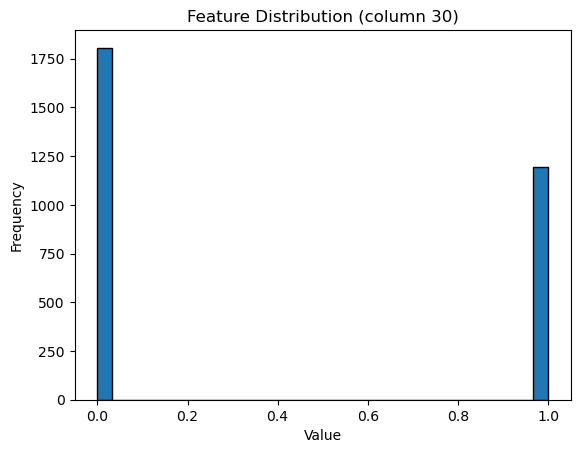

30
0    1806
1    1194
Name: count, dtype: int64
Percent of Data Labeled 0: 0.602 
Percent of Data Labeled 1: 0.398 


In [18]:
plt.hist(target_combined, bins=30, edgecolor='black')
plt.title('Feature Distribution (column 30)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()
print(target_combined.value_counts())
print(f"Percent of Data Labeled 0: {target_combined.value_counts()[0] / (target_combined.value_counts()[0]+ target_combined.value_counts()[1])} ")
print(f"Percent of Data Labeled 1: {target_combined.value_counts()[1] / (target_combined.value_counts()[0]+ target_combined.value_counts()[1])} ")


In [19]:
pd.DataFrame(features_combined).dropna()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,__source__
0,0.00,0.0000,0.0,0.0014,0.0000,0.0,0.0000,0.0000,0.0,0.0000,...,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0000,0.0029,A
1,0.00,0.0000,0.0,0.0031,-1.0000,0.0,0.0000,-1.0000,0.0,0.0000,...,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0031,0.0094,A
2,0.00,-1.0000,0.0,0.0045,-1.0000,0.0,0.0000,0.0159,0.0,0.0022,...,-1.0,0.0,0.0088,0.0,0.0,0.0,-1.0,0.0102,0.0011,A
3,0.00,0.0050,0.0,-1.0000,0.0000,0.0,-1.0000,0.0000,0.0,0.0000,...,0.0,0.0,-1.0000,0.0,0.0,0.0,0.0,0.0000,0.0133,A
4,0.01,0.0000,0.0,0.0000,0.0000,-1.0,0.0125,0.0000,0.0,0.0000,...,0.0,0.0,0.0093,0.0,0.0,0.0,0.0,0.0000,0.0000,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.00,0.0037,0.0,-1.0000,-1.0000,0.0,0.0000,0.0000,-1.0,0.0000,...,0.0,0.0,0.0000,0.0,-1.0,0.0,-1.0,0.0000,0.0000,B
2996,0.00,-1.0000,0.0,0.0000,0.0000,-1.0,-1.0000,0.0043,0.0,0.0043,...,0.0,0.0,0.0124,-1.0,0.0,-1.0,0.0,0.0043,0.0087,B
2997,0.00,0.0000,-1.0,0.0000,0.0000,-1.0,0.0000,-1.0000,0.0,0.0000,...,0.0,0.0,0.0129,-1.0,0.0,0.0,0.0,0.0000,-1.0000,B
2998,0.00,0.0000,0.0,0.0000,0.0000,0.0,-1.0000,0.0000,0.0,0.0000,...,0.0,0.0,-1.0000,-1.0,0.0,0.0,0.0,0.0000,0.0000,B


<h2>Dealing with NaNs</h2>
<p>We will have to use some imputation methods to deal with the missing values</p>
<p>Cannot drop misisng values, (99.8% data decrease), Impute mean or median or use regression technques </p>
<p>Split data into train and valudation. I don't believe that we need to scale the features due to them already being scaled by proportion </p>

In [20]:
from sklearn.model_selection import train_test_split,StratifiedShuffleSplit
from sklearn.impute import SimpleImputer

<h1>Splitting Validation Data</h1>
<h3>Note that we now have two datasets, each with 1500 rows. Now their distributions are very similar but their target distribution is a bit different </h3>
<p>For the training dataset we have: Percent of Data Labeled 0: 0.586. Percent of Data Labeled 1: 0.414 </p>
<p>For the Validation dataset we have: Percent of Data Labeled 0: 0.618. Percent of Data Labeled 1: 0.382</p>

<p>I will train the model on the training data, and then split the validation data into val and test. It will be a 50/50 split, in which I will maintain the target distribution of the validation data</p>

In [21]:
stratum = target_combined.astype(str) + '_' + features_combined['__source__']

In [22]:
stratum

0       1_A
1       1_A
2       1_A
3       1_A
4       0_A
       ... 
2995    0_B
2996    1_B
2997    0_B
2998    0_B
2999    1_B
Length: 3000, dtype: object

In [23]:
# Stratified shuffle split into train/val/test (example 60/20/20)
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_idx, temp_idx = next(sss.split(features_combined, stratum))

In [24]:
X_train = features_combined.iloc[train_idx]
y_train = target_combined.iloc[train_idx]

X_test = features_combined.iloc[temp_idx]
y_test = target_combined.iloc[temp_idx]

In [25]:
features_combined["__source__"].value_counts(), X_train["__source__"].value_counts(), X_test["__source__"].value_counts(), 

(__source__
 A    1500
 B    1500
 Name: count, dtype: int64,
 __source__
 A    1200
 B    1200
 Name: count, dtype: int64,
 __source__
 B    300
 A    300
 Name: count, dtype: int64)

In [26]:
X_train = X_train.drop(columns='__source__')
X_test = X_test.drop(columns='__source__')

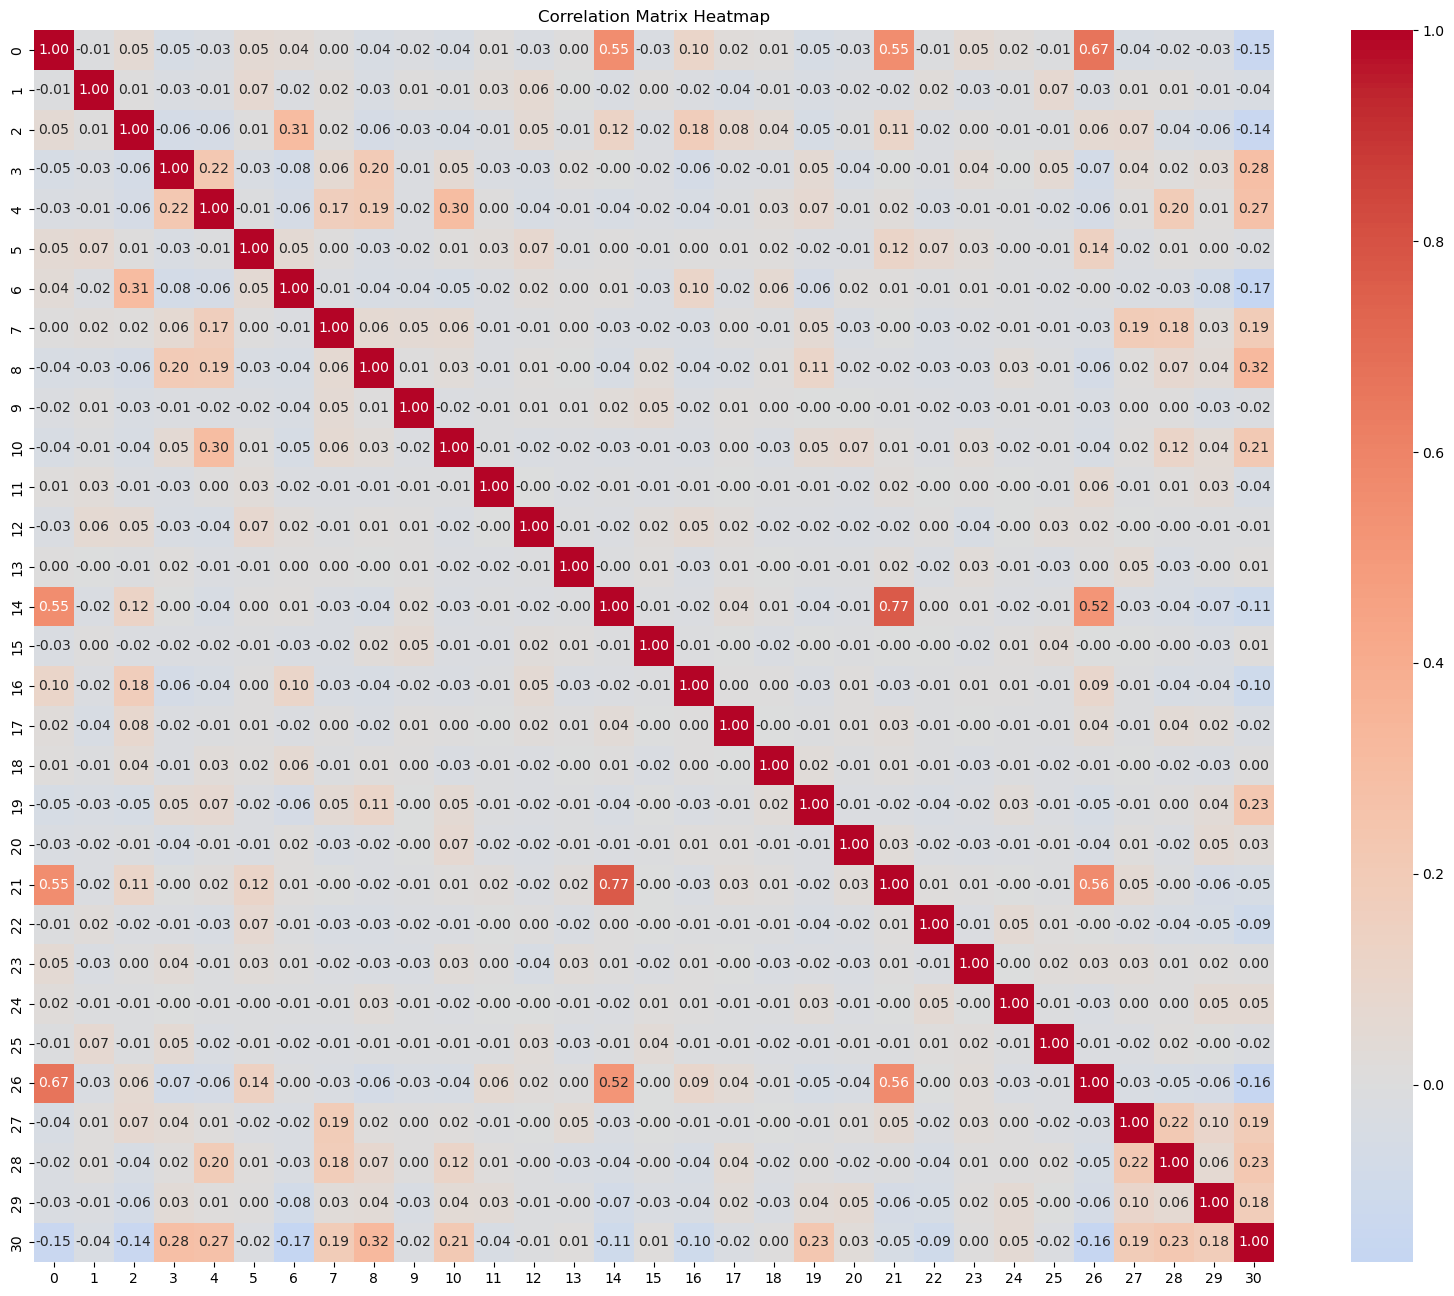

CPU times: total: 1.8 s
Wall time: 1.81 s


In [27]:
%%time
plt.figure(figsize=(20, 16))
sns.heatmap(pd.concat([X_train,y_train],axis=1).replace(-1, np.nan).corr(), annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [28]:
X_test.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,...,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,-0.192190,-0.202691,-0.199431,-0.205325,-0.182254,-0.222612,-0.182210,-0.181236,-0.229249,-0.228389,...,-0.189070,-0.190993,-0.181239,-0.230296,-0.196072,-0.193016,-0.217480,-0.203018,-0.212629,-0.229366
std,0.395834,0.403147,0.400631,0.408082,0.387790,0.417233,0.387811,0.388294,0.421605,0.422229,...,0.393113,0.394287,0.386104,0.423035,0.398156,0.395424,0.413934,0.402977,0.410379,0.423540
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.002500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002875
max,0.047600,0.040000,0.035700,0.100000,0.033300,0.045400,0.033300,0.050000,0.031200,0.142800,...,0.052600,0.047600,0.041600,0.090900,0.103800,0.083300,0.047600,0.016100,0.033300,0.051000


In [29]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((2400, 30), (2400,), (600, 30), (600,))

In [30]:
print(f"Percent of Validation Data Labeled 0: {y_train.value_counts()[0] / (y_train.value_counts()[0]+ y_train.value_counts()[1])} ")
print(f"Percent of Validation Data Labeled 1: {y_train.value_counts()[1] / (y_train.value_counts()[0]+ y_train.value_counts()[1])} ")

print("*************************")

print(f"Percent of Test Data Labeled 0: {y_test.value_counts()[0] / (y_test.value_counts()[0]+ y_test.value_counts()[1])} ")
print(f"Percent of Test Data Labeled 1: {y_test.value_counts()[1] / (y_test.value_counts()[0]+ y_test.value_counts()[1])} ")


Percent of Validation Data Labeled 0: 0.6020833333333333 
Percent of Validation Data Labeled 1: 0.39791666666666664 
*************************
Percent of Test Data Labeled 0: 0.6016666666666667 
Percent of Test Data Labeled 1: 0.3983333333333333 


In [31]:
train_means = X_train.mean()
test_means = X_test.mean()
drift = (train_means - test_means).abs().sort_values(ascending=False)
print(drift.head(10))


10    0.060570
5     0.040490
8     0.031897
12    0.029602
9     0.027978
23    0.027584
29    0.027581
17    0.025434
22    0.025272
4     0.024086
dtype: float64


In [32]:
train_corr = X_train.corr().abs().values
test_corr = X_test.corr().abs().values
np.mean(np.abs(train_corr - test_corr))

np.float64(0.02352537025696691)

<h1>Imputing Data</h1>
<h3>Various strategies can be utilized here: Mean imputation, Median imputation, KNN imputation, etc.</h3>
<p>It is worth noting that the models appear to insignificantly (+ .2% -.5% improved AUC ) perform better with mean imputation</p>
<p>It is also worth noting that despite the AUC dropping when we swap to KNN Imputation, the TPR at 1% FPR significantly (+ 0.05 - .1) rises</p>
<p>Finally, as we plan to utilize cross validation, we will be fusing our training and validation dataset as cross validation will arbitrarily split them for us</p>

In [33]:
mean_imputer = SimpleImputer(strategy='mean', missing_values=-1)
X_train_mean_imputation = pd.DataFrame(mean_imputer.fit_transform(X_train),
                                       columns=X_train.columns)
X_test_mean_imputation = pd.DataFrame(mean_imputer.transform(X_test),
                                     columns=X_test.columns)

median_imputer = SimpleImputer(strategy='median', missing_values=-1)
X_train_median_imputation = pd.DataFrame(median_imputer.fit_transform(X_train),
                                         columns=X_train.columns)
X_test_median_imputation = pd.DataFrame(median_imputer.transform(X_test),
                                       columns=X_test.columns)



In [34]:
X_train = X_train.replace(-1, np.nan)
X_test = X_test.replace(-1, np.nan)

In [35]:
X_train_mean_imputation.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,...,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000
mean,0.000845,0.001058,0.000469,0.002962,0.001464,0.000972,0.001401,0.002233,0.001224,0.002095,...,0.001525,0.000631,0.000721,0.001828,0.001433,0.000081,0.000958,0.000504,0.000882,0.002993
std,0.003883,0.003965,0.002031,0.005425,0.004308,0.005293,0.003937,0.004965,0.003738,0.011078,...,0.007663,0.002907,0.005063,0.004656,0.010247,0.000925,0.004117,0.002298,0.002578,0.004808
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002000
75%,0.000845,0.001058,0.000469,0.002962,0.001464,0.000000,0.001401,0.002233,0.001224,0.002095,...,0.001525,0.000631,0.000721,0.001828,0.000000,0.000000,0.000958,0.000504,0.000882,0.003200
max,0.058800,0.111100,0.034400,0.062500,0.071400,0.100000,0.068900,0.075500,0.072700,0.142800,...,0.142800,0.047600,0.166600,0.076900,0.171000,0.034400,0.058800,0.023800,0.052600,0.045400


In [36]:
X_train_median_imputation.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,...,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000
mean,0.000685,0.000856,0.000374,0.002368,0.001160,0.000794,0.001118,0.001776,0.000981,0.001672,...,0.001211,0.000497,0.000572,0.001455,0.001148,0.000065,0.000754,0.000398,0.000714,0.002382
std,0.003897,0.003987,0.002040,0.005553,0.004349,0.005306,0.003977,0.005046,0.003770,0.011110,...,0.007688,0.002918,0.005071,0.004714,0.010263,0.000926,0.004136,0.002307,0.002601,0.004957
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.002200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003200
max,0.058800,0.111100,0.034400,0.062500,0.071400,0.100000,0.068900,0.075500,0.072700,0.142800,...,0.142800,0.047600,0.166600,0.076900,0.171000,0.034400,0.058800,0.023800,0.052600,0.045400


In [37]:
X_train_cur = X_train_median_imputation
X_test_cur = X_test_median_imputation


In [38]:
X_train_cur.shape,X_test_cur.shape, y_train.shape, y_test.shape

((2400, 30), (600, 30), (2400,), (600,))

In [39]:
X_train_cur

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.0008,0.0000,0.000,0.0000,0.0000,0.0,0.0134,0.0033,0.0000,0.0008,...,0.0000,0.0,0.0000,0.0000,0.0,0.000,0.0,0.0008,0.0016,0.0000
1,0.0000,0.0000,0.000,0.0067,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0,0.0000,0.0000,0.0,0.000,0.0,0.0000,0.0022,0.0000
2,0.0000,0.0000,0.002,0.0020,0.0020,0.0,0.0000,0.0080,0.0020,0.0030,...,0.0000,0.0,0.0000,0.0000,0.0,0.000,0.0,0.0150,0.0080,0.0000
3,0.0000,0.0000,0.000,0.0000,0.0000,0.0,0.0166,0.0000,0.0000,0.0000,...,0.0235,0.0,0.0166,0.0000,0.0,0.000,0.0,0.0000,0.0000,0.0000
4,0.0000,0.0000,0.000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,...,0.0175,0.0,0.0000,0.0093,0.0,0.000,0.0,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,0.0089,0.0012,0.000,0.0089,0.0000,0.0,0.0089,0.0000,0.0000,0.0000,...,0.0000,0.0,0.0000,0.0000,0.0,0.000,0.0,0.0000,0.0000,0.0000
2396,0.0000,0.0000,0.000,0.0000,0.0000,0.0,0.0434,0.0000,0.0000,0.0000,...,0.0188,0.0,0.0000,0.0000,0.0,0.000,0.0,0.0000,0.0000,0.0000
2397,0.0000,0.0000,0.000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0,0.0000,0.0173,0.0,0.000,0.0,0.0000,0.0000,0.0000
2398,0.0000,0.0000,0.000,0.0000,0.0124,0.0,0.0000,0.0000,0.0062,0.0000,...,0.0000,0.0,0.0000,0.0000,0.0,0.000,0.0,0.0000,0.0000,0.0062


In [40]:
#pip install lightgbm
#!pip install catboost

In [41]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

<h1>Feature Selection & Feature Engineering (Using previous optimized hyperparameters)</h1>

In [42]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import cross_val_score

In [43]:
def getFeatureImportanceDataframe(feature_importances,std,feature_names):
    data = pd.concat([forest_importances.sort_values(ascending=False),pd.Series(std, index=feature_names)],axis=1)
    return data.rename(columns={0: 'Impurity Decrease', 1: 'Std'})

In [44]:
randomforest_params = {
    'n_estimators': 100,
    'min_samples_split': 10,
    'min_samples_leaf': 1,
    'max_features': 'sqrt',
    'max_depth': 10,
    'bootstrap': False,
    "random_state":42
}


In [45]:
feature_names = [i for i in range(X_train.shape[1])]

base = RandomForestClassifier(**randomforest_params)
base.fit(X_train_cur,y_train)

importances = base.feature_importances_
std = np.std([tree.feature_importances_ for tree in base.estimators_], axis=0)

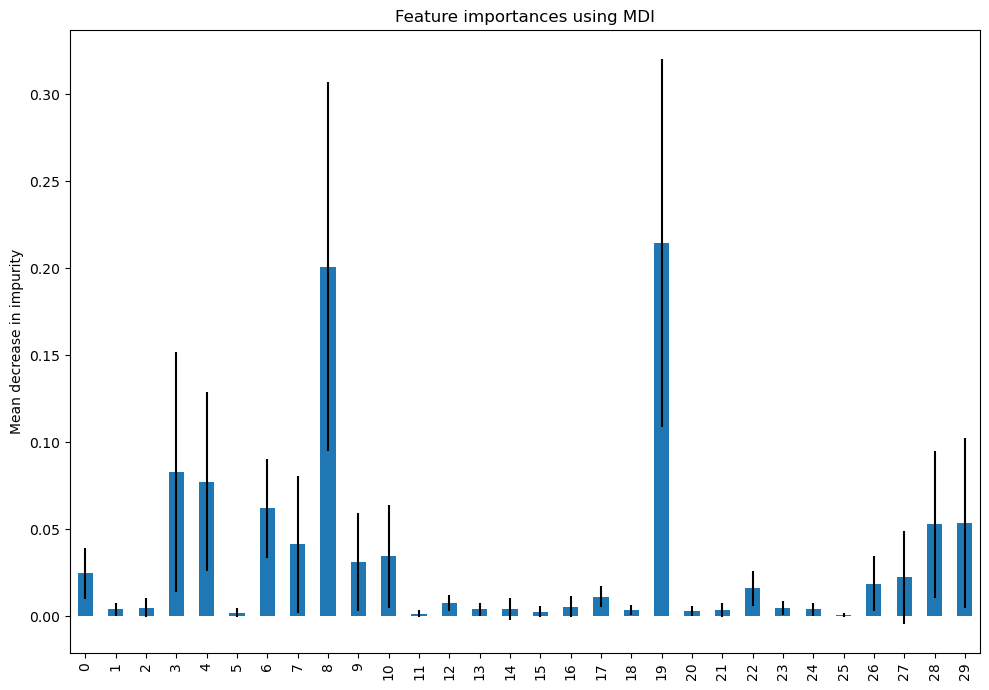

In [46]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots(figsize=(10, 7))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [47]:
res = getFeatureImportanceDataframe(forest_importances,std,feature_names)[:-16]
res

,Impurity Decrease,Std
19,0.214606,0.105851
8,0.200825,0.105976
3,0.082769,0.068916
4,0.077422,0.051445
6,0.062030,0.028505
29,0.053340,0.048832
28,0.052796,0.042262
7,0.041260,0.039515
10,0.034529,0.029498
9,0.031263,0.028202


In [48]:
result = permutation_importance(
    base, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
forest_importances = pd.Series(result.importances_mean, index=feature_names)

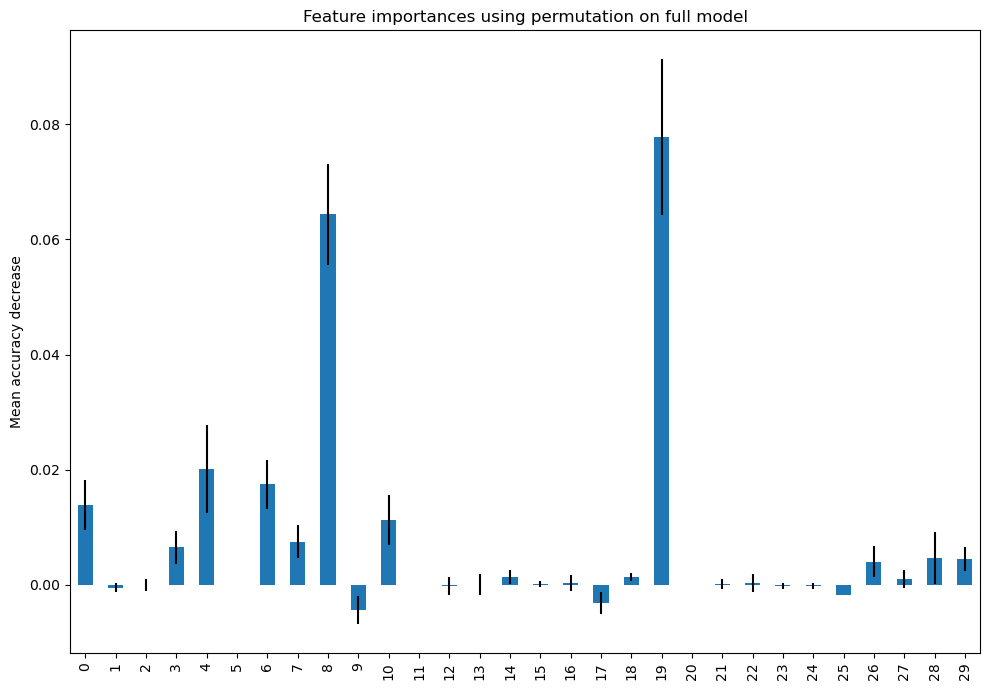

In [49]:
fig, ax = plt.subplots(figsize=(10, 7))
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

In [50]:
getFeatureImportanceDataframe(forest_importances,result.importances_std,feature_names)[:-16]

,Impurity Decrease,Std
19,0.077833,0.013562
8,0.064333,0.008731
4,0.020167,0.007654
6,0.017500,0.004233
0,0.013833,0.004349
10,0.011333,0.004333
7,0.007500,0.002911
3,0.006500,0.002833
28,0.004667,0.004522
29,0.004500,0.002115


In [51]:
cols = res.index
cols

Index([19, 8, 3, 4, 6, 29, 28, 7, 10, 9, 0, 27, 26, 22], dtype='int64')

In [52]:
X_test[cols]

,19,8,3,4,6,29,28,7,10,9,0,27,26,22
1736,0.0,NaN,0.0000,NaN,0.0094,0.0094,NaN,NaN,0.0000,0.0000,0.000,0.0000,0.0,0.000
160,0.0,NaN,0.0000,NaN,NaN,NaN,0.0000,NaN,0.0000,0.0000,0.000,0.0000,0.0,0.000
581,0.0,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.005,0.0000,0.0,0.005
1500,NaN,0.0000,NaN,0.0,NaN,0.0000,NaN,0.0000,0.0000,0.0000,0.000,NaN,0.0,NaN
2681,NaN,0.0000,0.0000,NaN,0.0000,NaN,NaN,NaN,0.0000,0.0042,0.000,NaN,NaN,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
896,0.0,0.0000,0.0036,0.0,0.0000,0.0027,0.0009,0.0000,0.0000,0.0000,0.000,NaN,0.0,NaN
117,0.0,NaN,0.0000,0.0,0.0000,NaN,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0,0.000
1837,0.0,0.0009,0.0104,NaN,0.0000,0.0014,0.0079,0.0000,0.0024,0.0009,0.000,0.0000,NaN,0.000
1036,0.0,0.0042,0.0000,0.0,0.0042,0.0000,0.0000,0.0042,0.0000,0.0000,0.000,0.0042,0.0,0.000


In [53]:
#!pip install shap
import shap


In [54]:
X_train_cur

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.0008,0.0000,0.000,0.0000,0.0000,0.0,0.0134,0.0033,0.0000,0.0008,...,0.0000,0.0,0.0000,0.0000,0.0,0.000,0.0,0.0008,0.0016,0.0000
1,0.0000,0.0000,0.000,0.0067,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0,0.0000,0.0000,0.0,0.000,0.0,0.0000,0.0022,0.0000
2,0.0000,0.0000,0.002,0.0020,0.0020,0.0,0.0000,0.0080,0.0020,0.0030,...,0.0000,0.0,0.0000,0.0000,0.0,0.000,0.0,0.0150,0.0080,0.0000
3,0.0000,0.0000,0.000,0.0000,0.0000,0.0,0.0166,0.0000,0.0000,0.0000,...,0.0235,0.0,0.0166,0.0000,0.0,0.000,0.0,0.0000,0.0000,0.0000
4,0.0000,0.0000,0.000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,...,0.0175,0.0,0.0000,0.0093,0.0,0.000,0.0,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,0.0089,0.0012,0.000,0.0089,0.0000,0.0,0.0089,0.0000,0.0000,0.0000,...,0.0000,0.0,0.0000,0.0000,0.0,0.000,0.0,0.0000,0.0000,0.0000
2396,0.0000,0.0000,0.000,0.0000,0.0000,0.0,0.0434,0.0000,0.0000,0.0000,...,0.0188,0.0,0.0000,0.0000,0.0,0.000,0.0,0.0000,0.0000,0.0000
2397,0.0000,0.0000,0.000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0,0.0000,0.0173,0.0,0.000,0.0,0.0000,0.0000,0.0000
2398,0.0000,0.0000,0.000,0.0000,0.0124,0.0,0.0000,0.0000,0.0062,0.0000,...,0.0000,0.0,0.0000,0.0000,0.0,0.000,0.0,0.0000,0.0000,0.0062


In [55]:
%%time
# Full pipeline: permutation importance, SHAP, forward-selection, stacking
# Requires: lightgbm, xgboost, catboost, shap, sklearn, pandas, numpy
from sklearn.linear_model import LogisticRegression
from sklearn.base import clone
from copy import deepcopy


# ---------- user-provided datasets (must exist) ----------
# X_train_cur, X_test_cur, y_train, y_test
# ---------- end dataset block ----------

# ---------- helper functions ----------
def tpr_at_fpr(y_true, y_score, fpr_target=0.01):
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    idx = np.where(fpr <= fpr_target)[0]
    if len(idx) == 0:
        return 0.0
    return tpr[idx[-1]]

def cv_metrics_for_model(model, X, y, cv, selected_cols=None):
    aucs = []
    tprs = []
    for train_idx, val_idx in cv.split(X, y):
        X_tr = X.iloc[train_idx] if isinstance(X, pd.DataFrame) else X[train_idx]
        X_val = X.iloc[val_idx] if isinstance(X, pd.DataFrame) else X[val_idx]
        y_tr, y_val = y.iloc[train_idx], y.iloc[val_idx]
        if selected_cols is not None:
            X_tr = X_tr[selected_cols]
            X_val = X_val[selected_cols]
        m = clone(model)
        # handle CatBoost silent fitting
        fit_kwargs = {}
        if isinstance(m, CatBoostClassifier):
            fit_kwargs = {'verbose': False}
        m.fit(X_tr, y_tr, **fit_kwargs)
        if hasattr(m, "predict_proba"):
            y_scores = m.predict_proba(X_val)[:, 1]
        else:
            y_scores = m.decision_function(X_val)
        aucs.append(roc_auc_score(y_val, y_scores))
        tprs.append(tpr_at_fpr(y_val, y_scores, fpr_target=0.01))
    return np.mean(aucs), np.mean(tprs)

xgb_params = {
    'booster': 'gbtree',
    'lambda': 2.291747136504949e-06,
    'alpha': 2.001229543085382e-06,
    'subsample': 0.8726203086510026,
    'colsample_bytree': 0.6359003258261658,
    'max_depth': 3,
    'eta': 0.07748868236998924,
    'gamma': 0.00016628953902927883,
    'min_child_weight': 4,
    'grow_policy': 'lossguide',
    'n_estimators': 500,
    'random_state':42
}
lightbgm_params = {
    'objective': 'binary',
    'metric': 'auc',
    'boosting_type': 'gbdt',
    'num_leaves': 66,
    'max_depth': 3,
    'learning_rate': 0.050199715062113674,
    'min_child_samples': 25,
    'subsample': 0.5626192183874275,
    'colsample_bytree': 0.7695965990568103,
    'lambda_l1': 0.16420137794083894,
    'lambda_l2': 7.949175936281098e-07,
    'min_split_gain': 0.8427003644214346,
    "verbose":-1,
    "random_state":42
}
catboost_params = {
    'iterations': 500,
    'depth': 6,
    'learning_rate': 0.03928686220839349,
    'l2_leaf_reg': 0.6149408710293484,
    'border_count': 105,
    'random_strength': 1.1727426750911354e-06,
    'boosting_type': 'Ordered',
    'bootstrap_type': 'Bayesian',
    'bagging_temperature': 0.8122221718596306,
    'random_state':42,
    'verbose': False,
}

randomforest_params = {
    'n_estimators': 100,
    'min_samples_split': 10,
    'min_samples_leaf': 1,
    'max_features': 'sqrt',
    'max_depth': 10,
    'bootstrap': False,
    "random_state":42
}

# instantiate models
lgb_base = lgb.LGBMClassifier(**lightbgm_params)
xgb_base = xgb.XGBClassifier(**xgb_params)
cat_base = CatBoostClassifier(**catboost_params)
random_base = RandomForestClassifier(**randomforest_params)

base_models = {'lgb': lgb_base, 'xgb': xgb_base, 'cat': cat_base, "random":random_base}
"""
# stratified cv
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# ---------- 1) Permutation importance (fit on full train, compute perm on train) ----------
print("1) Permutation importance (on full training set)")
perm_model = clone(lgb_base)  # use LGBM as reference for permutation importance
perm_model.fit(X_train_cur, y_train)
perm = permutation_importance(perm_model, X_train_cur, y_train,
                              scoring='roc_auc', n_repeats=10, random_state=42, n_jobs=-1)
perm_importances = pd.Series(perm.importances_mean, index=X_train_cur.columns).sort_values(ascending=False)
print("Top 20 permutation importance features:")
print(perm_importances.head(20))

# ---------- 2) SHAP ranking (use LGBM TreeExplainer) ----------
print("\n2) SHAP feature importance (TreeExplainer on LGBM)")
explainer = shap.TreeExplainer(perm_model)
shap_vals = explainer.shap_values(X_train_cur)   # for binary: shap_vals[1] often
# shap for LightGBM returns array-like where shap_vals is 2D for binary; handle both
if isinstance(shap_vals, list) and len(shap_vals) == 2:
    shap_arr = shap_vals[1]
else:
    shap_arr = shap_vals
mean_abs_shap = np.abs(shap_arr).mean(axis=0)
shap_series = pd.Series(mean_abs_shap, index=X_train_cur.columns).sort_values(ascending=False)
print("Top 20 SHAP features:")
print(shap_series.head(20))

# ---------- Candidate pool: union of top-K SHAP + Permutation ----------
k_shap = 20
k_perm = 20
cand_shap = set(shap_series.head(k_shap).index)
cand_perm = set(perm_importances.head(k_perm).index)
candidates = list(cand_shap.union(cand_perm))
print(f"\nCandidate pool size (SHAP {k_shap} U Perm {k_perm}): {len(candidates)}")

# ---------- 3) Forward (greedy) selection using CV (wrapper) ----------
print("\n3) Forward selection (greedy) using CV; primary metric: mean AUC, tie-breaker: mean TPR@1%FPR")
def forward_select_greedy(X, y, candidate_features, base_model, cv, max_feats=20, improvement_tol=1e-4):
    remaining = candidate_features.copy()
    selected = []
    best_auc = -np.inf

    while len(selected) < max_feats and remaining:
        candidate_results = {}
        for feat in remaining:
            cols = selected + [feat]
            auc_mean, tpr_mean = cv_metrics_for_model(base_model, X, y, cv, selected_cols=cols)
            candidate_results[feat] = (auc_mean, tpr_mean)
        # choose best by AUC, tie-breaker tpr
        best_feat, (best_feat_auc, best_feat_tpr) = max(candidate_results.items(), key=lambda kv: (kv[1][0], kv[1][1]))
        if best_feat_auc > best_auc + improvement_tol:
            selected.append(best_feat)
            remaining.remove(best_feat)
            best_auc = best_feat_auc
            print(f"Added {best_feat} | AUC: {best_feat_auc:.5f} | TPR@1%FPR: {best_feat_tpr:.5f} | selected_count: {len(selected)}")
        else:
            # no meaningful improvement
            print("No further improvement; stopping forward selection.")
            break
    return selected

# Limit candidate_features to top 40 to keep search feasible
candidate_limit = 30
candidate_list = candidates[:candidate_limit]
print("Using candidate_list length:", len(candidate_list))

# Use LGBM as wrapper base (fast)
selected_features = forward_select_greedy(X_train_cur, y_train, candidate_list, lgb_base, cv, max_feats=20)
print("\nSelected features (final):", selected_features)

# ---------- 4) Stacking ensemble using OOF predictions ----------
print("\n4) Stacking ensemble (OOF predictions)")

def get_oof_predictions(models_dict, X_train, y_train, X_test, selected_cols, cv):
    n_models = len(models_dict)
    oof_train = np.zeros((X_train.shape[0], n_models))
    oof_test = np.zeros((X_test.shape[0], n_models))
    test_fold_preds = np.zeros((X_test.shape[0], cv.get_n_splits()))
    for i, (name, model) in enumerate(models_dict.items()):
        print(f"Generating OOF for {name}")
        oof = np.zeros(X_train.shape[0])
        fold_test_preds = np.zeros((X_test.shape[0], cv.get_n_splits()))
        for fold, (tr_idx, val_idx) in enumerate(cv.split(X_train, y_train)):
            X_tr = X_train.iloc[tr_idx][selected_cols]
            X_val = X_train.iloc[val_idx][selected_cols]
            y_tr, y_val = y_train.iloc[tr_idx], y_train.iloc[val_idx]

            m = clone(model)
            fit_kwargs = {}
            if isinstance(m, CatBoostClassifier):
                fit_kwargs = {'verbose': False}
            # if model supports early stopping when given eval_set, you may add it here
            m.fit(X_tr, y_tr, **fit_kwargs)
            oof[val_idx] = m.predict_proba(X_val)[:,1]
            fold_test_preds[:, fold] = m.predict_proba(X_test[selected_cols])[:,1]

        oof_train[:, i] = oof
        oof_test[:, i] = fold_test_preds.mean(axis=1)
    return oof_train, oof_test

# make shallow copies of tuned models to avoid accidental state sharing
models_for_stack = {k: deepcopy(v) for k,v in base_models.items()}

# if forward selection returned empty (edge-case), fallback to top-10 shap
if not selected_features:
    selected_features = shap_series.head(10).index.tolist()
    print("Fallback selected_features:", selected_features)

# Generate OOF preds
oof_train_preds, oof_test_preds = get_oof_predictions(models_for_stack, X_train_cur, y_train, X_test_cur, selected_features, cv)

# Train meta-learner
meta = LogisticRegression(max_iter=2000, solver='lbfgs')
meta.fit(oof_train_preds, y_train)

# Final ensemble predictions
final_test_proba = meta.predict_proba(oof_test_preds)[:,1]
final_auc = roc_auc_score(y_test, final_test_proba)
final_tpr = tpr_at_fpr(y_test, final_test_proba, fpr_target=0.01)
final_cm = confusion_matrix(y_test, (final_test_proba >= 0.5).astype(int))

print("\nStacking final results on test:")
print(f"Final AUC: {final_auc:.5f}")
print(f"Final TPR@1%FPR: {final_tpr:.5f}")
print("Confusion matrix (threshold=0.5):")
print(final_cm)

# Also print per-base model CV metrics (on same selected features)
print("\nPer-base model CV metrics (on selected_features):")
for name, model in base_models.items():
    auc_cv, tpr_cv = cv_metrics_for_model(model, X_train_cur, y_train, cv, selected_cols=selected_features)
    print(f"{name}: CV AUC {auc_cv:.5f} | CV TPR@1%FPR {tpr_cv:.5f}")

# And single-model test evaluations for comparison
print("\nSingle-model test results (selected_features):")
for name, model in base_models.items():
    m = clone(model)
    fit_kwargs = {}
    if isinstance(m, CatBoostClassifier):
        fit_kwargs = {'verbose': False}
    m.fit(X_train_cur[selected_features], y_train, **fit_kwargs)
    y_test_scores = m.predict_proba(X_test_cur[selected_features])[:,1]
    print(name, "Test AUC:", roc_auc_score(y_test, y_test_scores),
          "Test TPR@1%FPR:", tpr_at_fpr(y_test, y_test_scores, fpr_target=0.01),
          "ConfMat:", confusion_matrix(y_test, (y_test_scores>=0.5).astype(int)) )

# Return key objects / variables to the workspace (if run in notebook)
results = {
    'perm_importances': perm_importances,
    'shap_ranking': shap_series,
    'candidate_pool': candidate_list,
    'selected_features': selected_features,
    'oof_train_preds': oof_train_preds,
    'oof_test_preds': oof_test_preds,
    'meta_model': meta,
    'final_test_proba': final_test_proba,
    'final_auc': final_auc,
    'final_tpr': final_tpr
}

print("\nDone.")

"""






CPU times: total: 0 ns
Wall time: 1.27 ms


'\n# stratified cv\ncv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)\n\n# ---------- 1) Permutation importance (fit on full train, compute perm on train) ----------\nprint("1) Permutation importance (on full training set)")\nperm_model = clone(lgb_base)  # use LGBM as reference for permutation importance\nperm_model.fit(X_train_cur, y_train)\nperm = permutation_importance(perm_model, X_train_cur, y_train,\n                              scoring=\'roc_auc\', n_repeats=10, random_state=42, n_jobs=-1)\nperm_importances = pd.Series(perm.importances_mean, index=X_train_cur.columns).sort_values(ascending=False)\nprint("Top 20 permutation importance features:")\nprint(perm_importances.head(20))\n\n# ---------- 2) SHAP ranking (use LGBM TreeExplainer) ----------\nprint("\n2) SHAP feature importance (TreeExplainer on LGBM)")\nexplainer = shap.TreeExplainer(perm_model)\nshap_vals = explainer.shap_values(X_train_cur)   # for binary: shap_vals[1] often\n# shap for LightGBM returns ar

In [56]:

"""

Top 20 permutation importance features:
19    0.059735
8     0.058382
6     0.021826
4     0.014656
28    0.011225
3     0.010813
0     0.008253
22    0.006175
9     0.005600
10    0.004917
29    0.004456
26    0.004337
16    0.003373
7     0.002571
27    0.002571
2     0.000764
17    0.000179
23    0.000031
12    0.000028
1     0.000014
dtype: float64

2) SHAP feature importance (TreeExplainer on LGBM)
Top 20 SHAP features:
19    0.558893
8     0.492685
6     0.255698
4     0.238428
3     0.235577
28    0.166678
0     0.130514
29    0.110895
26    0.108356
7     0.092478
9     0.090877
27    0.080809
10    0.079903
22    0.073417
16    0.040467
2     0.022403
17    0.007920
12    0.004931
23    0.001145
1     0.000893
dtype: float64

Candidate pool size (SHAP 20 U Perm 20): 20

3) Forward selection (greedy) using CV; primary metric: mean AUC, tie-breaker: mean TPR@1%FPR
Using candidate_list length: 20


Added 19 | AUC: 0.69258 | TPR@1%FPR: 0.07539 | selected_count: 1
Added 8 | AUC: 0.77898 | TPR@1%FPR: 0.24712 | selected_count: 2
Added 3 | AUC: 0.81968 | TPR@1%FPR: 0.28168 | selected_count: 3
Added 6 | AUC: 0.84719 | TPR@1%FPR: 0.30471 | selected_count: 4
Added 4 | AUC: 0.86625 | TPR@1%FPR: 0.36021 | selected_count: 5
Added 28 | AUC: 0.87664 | TPR@1%FPR: 0.37173 | selected_count: 6
Added 0 | AUC: 0.88602 | TPR@1%FPR: 0.38429 | selected_count: 7
Added 29 | AUC: 0.89078 | TPR@1%FPR: 0.39372 | selected_count: 8
Added 22 | AUC: 0.89501 | TPR@1%FPR: 0.38534 | selected_count: 9
Added 9 | AUC: 0.89769 | TPR@1%FPR: 0.38429 | selected_count: 10
Added 16 | AUC: 0.90156 | TPR@1%FPR: 0.40419 | selected_count: 11
Added 10 | AUC: 0.90191 | TPR@1%FPR: 0.40000 | selected_count: 12
Added 7 | AUC: 0.90419 | TPR@1%FPR: 0.40838 | selected_count: 13
Added 2 | AUC: 0.90444 | TPR@1%FPR: 0.42618 | selected_count: 14
Added 26 | AUC: 0.90590 | TPR@1%FPR: 0.43770 | selected_count: 15
Added 27 | AUC: 0.90615 | TPR@1%FPR: 0.45654 | selected_count: 16
No further improvement; stopping forward selection.

Selected features (final): [19, 8, 3, 6, 4, 28, 0, 29, 22, 9, 16, 10, 7, 2, 26, 27]

4) Stacking ensemble (OOF predictions)
Generating OOF for lgb
Generating OOF for xgb
Generating OOF for cat
Generating OOF for random

Stacking final results on test:
Final AUC: 0.90423
Final TPR@1%FPR: 0.37238
Confusion matrix (threshold=0.5):
[[334  27]
 [ 62 177]]

Per-base model CV metrics (on selected_features):
lgb: CV AUC 0.90615 | CV TPR@1%FPR 0.45654
xgb: CV AUC 0.90626 | CV TPR@1%FPR 0.43037
cat: CV AUC 0.90865 | CV TPR@1%FPR 0.44712
random: CV AUC 0.90288 | CV TPR@1%FPR 0.40942

Single-model test results (selected_features):
lgb Test AUC: 0.8985210769712213 Test TPR@1%FPR: 0.39330543933054396 ConfMat: [[338  23]
 [ 66 173]]
xgb Test AUC: 0.9054462847274539 Test TPR@1%FPR: 0.3263598326359833 ConfMat: [[331  30]
 [ 65 174]]
cat Test AUC: 0.9009898121211417 Test TPR@1%FPR: 0.3054393305439331 ConfMat: [[332  29]
 [ 65 174]]
random Test AUC: 0.8968462777732704 Test TPR@1%FPR: 0.3891213389121339 ConfMat: [[331  30]
 [ 63 176]]

Done.
CPU times: total: 13min 9s
Wall time: 2min 28s
"""

'\n\nTop 20 permutation importance features:\n19    0.059735\n8     0.058382\n6     0.021826\n4     0.014656\n28    0.011225\n3     0.010813\n0     0.008253\n22    0.006175\n9     0.005600\n10    0.004917\n29    0.004456\n26    0.004337\n16    0.003373\n7     0.002571\n27    0.002571\n2     0.000764\n17    0.000179\n23    0.000031\n12    0.000028\n1     0.000014\ndtype: float64\n\n2) SHAP feature importance (TreeExplainer on LGBM)\nTop 20 SHAP features:\n19    0.558893\n8     0.492685\n6     0.255698\n4     0.238428\n3     0.235577\n28    0.166678\n0     0.130514\n29    0.110895\n26    0.108356\n7     0.092478\n9     0.090877\n27    0.080809\n10    0.079903\n22    0.073417\n16    0.040467\n2     0.022403\n17    0.007920\n12    0.004931\n23    0.001145\n1     0.000893\ndtype: float64\n\nCandidate pool size (SHAP 20 U Perm 20): 20\n\n3) Forward selection (greedy) using CV; primary metric: mean AUC, tie-breaker: mean TPR@1%FPR\nUsing candidate_list length: 20\n\n\nAdded 19 | AUC: 0.69258 

In [57]:
selected_features = [19, 8, 3, 6, 4, 28, 0, 29, 22, 9, 16, 10, 7, 2, 26, 27]

In [58]:
X_train_reduced = X_train_cur[selected_features]
X_test_reduced = X_test_cur[selected_features]

In [59]:
# CatBoost performs better w/o imputation
# RandomForest is indifferent to imputation
# Xgboost performs bettwe with imputation 
# lightbgm performs better with imputation

<h1>HyperParameter Tuning</h1>

<p>We currently have 4 performing models (in no particular order):</p>
<p style="text-indent: 30px;">LightBGM (Gradient boosting (leaf-wise) Model)</p>
<p style="text-indent: 30px;">RandomForestClassifier (Gradient boosting (level-wise))</p>
<p style="text-indent: 30px;">CatBoost (Gradient boosting (ordered boosting + cat encoding))</p>
<p style="text-indent: 30px;">XGBoost (Bagging (non-boosting))</p>

<p>In order to proceed, we must figure out the best hyper-parameters for these models on our data.</p>
<p>To prevent overfitting, we will utilize StratifiedKFold when hyperparameter tuning</p>
<p>For our boosting models, we will utilize Optuna, an effective framework for hyperparameter optimization of boosting models </p>
<p>For our non-boosting models (RandomForest), we will use RandomizedSearchCV </p>

In [60]:
def tpr_at_fpr(y_true, y_score, fpr_target=0.01):
    fpr, tpr, _ = roc_curve(y_true, y_score)
    # Interpolate TPR at the target FPR
    return np.interp(fpr_target, fpr, tpr)


In [61]:
import optuna
from sklearn.model_selection import RandomizedSearchCV

In [62]:
def XGBoostObjective(trial):
    # Suggest hyperparameters for XGBoost
    param = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'booster': trial.suggest_categorical('booster', ['gbtree', 'gblinear', 'dart']),
        'lambda': trial.suggest_float('lambda', 1e-8, 1.0, log=True),
        'alpha': trial.suggest_float('alpha', 1e-8, 1.0, log=True),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'max_depth': trial.suggest_int('max_depth', 3, 9),
        'eta': trial.suggest_float('eta', 1e-8, 1.0, log=True),
        'gamma': trial.suggest_float('gamma', 1e-8, 1.0, log=True),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'random_state': 42,
        'n_estimators': 500,
        'eval_metric':'auc',
        'early_stopping_rounds':30,

    }

    # Conditional parameters based on booster type
    if param['booster'] == 'gbtree' or param['booster'] == 'dart':
        param['grow_policy'] = trial.suggest_categorical('grow_policy', ['depthwise', 'lossguide'])
    if param['booster'] == 'dart':
        param['sample_type'] = trial.suggest_categorical('sample_type', ['uniform', 'weighted'])
        param['normalize_type'] = trial.suggest_categorical('normalize_type', ['tree', 'forest'])
        param['rate_drop'] = trial.suggest_float('rate_drop', 1e-8, 1.0, log=True)
        param['skip_drop'] = trial.suggest_float('skip_drop', 1e-8, 1.0, log=True)

    model = xgb.XGBClassifier(**param)
    aucs = []
    tprs = []
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    for train_idx, val_idx in cv.split(X_train_reduced, y_train):
        X_train_stratified, X_val_stratified = X_train_reduced.iloc[train_idx], X_train_reduced.iloc[val_idx]
        y_train_stratified, y_val_stratified = y_train.iloc[train_idx], y_train.iloc[val_idx]
        
        model.fit(
            X_train_stratified, y_train_stratified,
            eval_set=[(X_val_stratified, y_val_stratified)],
            verbose=False
        )
        
        y_scores = model.predict_proba(X_val_stratified)[:, 1]

        
        aucs.append(roc_auc_score(y_val_stratified, y_scores))
        #tprs.append(tpr_at_fpr(y_val_stratified, y_scores, fpr_target=0.01))

    # Which do we maximize?? AUC or TPR? Is there a better metric to maximize?? Accuracy? 
    return np.mean(aucs)

"""
# Create a study and optimize
study = optuna.create_study(direction='maximize')
study.optimize(XGBoostObjective, n_trials=100)

print("Best trial:")
trial = study.best_trial
print(f"  Value: {trial.value}")
print("  Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")
"""

"""
Best trial:
  Value: 0.9094657511911448
  Params: 
    booster: gbtree
    lambda: 5.798810453935748e-05
    alpha: 8.95912069983079e-06
    subsample: 0.9989943093874862
    colsample_bytree: 0.754192234130516
    max_depth: 7
    eta: 0.07323872945844974
    gamma: 1.719958254805491e-05
    min_child_weight: 7
    grow_policy: lossguide
"""

'\nBest trial:\n  Value: 0.9094657511911448\n  Params: \n    booster: gbtree\n    lambda: 5.798810453935748e-05\n    alpha: 8.95912069983079e-06\n    subsample: 0.9989943093874862\n    colsample_bytree: 0.754192234130516\n    max_depth: 7\n    eta: 0.07323872945844974\n    gamma: 1.719958254805491e-05\n    min_child_weight: 7\n    grow_policy: lossguide\n'

In [63]:
def LightGBMObjective(trial):
    param = {
        'objective': 'binary',
        'metric': 'auc',
        'boosting_type': trial.suggest_categorical('boosting_type', ['gbdt', 'dart']),
        'num_leaves': trial.suggest_int('num_leaves', 15, 1000, log=True),
        'max_depth': trial.suggest_int('max_depth', 3, 20),
        'learning_rate': trial.suggest_float('learning_rate', 1e-3, 0.3, log=True),
        'n_estimators': 500,
        'min_child_samples': trial.suggest_int('min_child_samples', 10, 100),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'lambda_l1': trial.suggest_float('lambda_l1', 1e-8, 10.0, log=True),
        'lambda_l2': trial.suggest_float('lambda_l2', 1e-8, 10.0, log=True),
        'min_split_gain': trial.suggest_float('min_split_gain', 0, 1),
        'random_state': 42,
        'verbosity': -1,
        'eval_metric':'auc',
        'early_stopping_rounds':30,
        "verbose":False,
    }

    model = lgb.LGBMClassifier(**param)
    aucs = []
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


    for train_idx, val_idx in cv.split(X_train_reduced, y_train):
        X_tr, X_val = X_train_reduced.iloc[train_idx], X_train_reduced.iloc[val_idx]
        y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

        model.fit(
            X_tr, y_tr,
            eval_set=[(X_val, y_val)],
        )

        y_pred = model.predict_proba(X_val)[:, 1]
        aucs.append(roc_auc_score(y_val, y_pred))

    return np.mean(aucs)
"""
study = optuna.create_study(direction='maximize')
study.optimize(LightGBMObjective, n_trials=100)

print("Best trial:")
trial = study.best_trial
print(f"  Value: {trial.value}")
print("  Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")
"""

"""
Best trial:
  Value: 0.910188590373014
  Params: 
    boosting_type: gbdt
    num_leaves: 20
    max_depth: 14
    learning_rate: 0.10255311901589008
    min_child_samples: 46
    subsample: 0.5451230681014977
    colsample_bytree: 0.7303499508702832
    lambda_l1: 0.010312452299451868
    lambda_l2: 6.97683014363191e-06
    min_split_gain: 0.5673420764306757
"""

'\nBest trial:\n  Value: 0.910188590373014\n  Params: \n    boosting_type: gbdt\n    num_leaves: 20\n    max_depth: 14\n    learning_rate: 0.10255311901589008\n    min_child_samples: 46\n    subsample: 0.5451230681014977\n    colsample_bytree: 0.7303499508702832\n    lambda_l1: 0.010312452299451868\n    lambda_l2: 6.97683014363191e-06\n    min_split_gain: 0.5673420764306757\n'

In [64]:
%%time 
def CatBoostObjective(trial):
    # Base parameter set
    param = {
        'iterations': 500,
        'depth': trial.suggest_int('depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 1e-3, 0.3, log=True),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-8, 10.0, log=True),
        'border_count': trial.suggest_int('border_count', 32, 255),
        'random_strength': trial.suggest_float('random_strength', 1e-8, 10.0, log=True),
        'boosting_type': trial.suggest_categorical('boosting_type', ['Plain', 'Ordered']),
        'bootstrap_type': trial.suggest_categorical('bootstrap_type', ['Bayesian', 'Bernoulli', 'MVS']),
        'eval_metric': 'AUC',
        'verbose': False,
        'random_seed': 42
    }

    # Handle bootstrap-specific constraints
    if param['bootstrap_type'] == 'Bayesian':
        # Bayesian does NOT support subsample, but uses bagging_temperature
        param['bagging_temperature'] = trial.suggest_float('bagging_temperature', 0, 1)
    elif param['bootstrap_type'] == 'Bernoulli':
        # Bernoulli supports subsample
        param['subsample'] = trial.suggest_float('subsample', 0.5, 1.0)
    elif param['bootstrap_type'] == 'MVS':
        # MVS does NOT use subsample or bagging_temperature
        pass

    # Initialize model
    model = CatBoostClassifier(**param)

    aucs = []
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Stratified CV loop
    for train_idx, val_idx in cv.split(X_train_reduced, y_train):
        X_tr, X_val = X_train_reduced.iloc[train_idx], X_train_reduced.iloc[val_idx]
        y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

        model.fit(X_tr, y_tr, eval_set=(X_val, y_val), use_best_model=True, verbose=False)
        y_pred = model.predict_proba(X_val)[:, 1]
        aucs.append(roc_auc_score(y_val, y_pred))

    return np.mean(aucs)


# Optuna study
"""
study = optuna.create_study(direction='maximize')
study.optimize(CatBoostObjective, n_trials=100)

print("Best trial:")
trial = study.best_trial
print(f"  Value: {trial.value}")
print("  Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")
"""

"""
Best trial:
  Value: 0.9110726643598616
  Params: 
    depth: 4
    learning_rate: 0.1074914709131715
    l2_leaf_reg: 0.4616445491798486
    border_count: 213
    random_strength: 0.019752890792447592
    boosting_type: Plain
    bootstrap_type: Bayesian
    bagging_temperature: 0.7990418427652377
"""

CPU times: total: 0 ns
Wall time: 86.8 μs


'\nBest trial:\n  Value: 0.9110726643598616\n  Params: \n    depth: 4\n    learning_rate: 0.1074914709131715\n    l2_leaf_reg: 0.4616445491798486\n    border_count: 213\n    random_strength: 0.019752890792447592\n    boosting_type: Plain\n    bootstrap_type: Bayesian\n    bagging_temperature: 0.7990418427652377\n'

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [100, 200, 500, 1000],
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False],
}
"""
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rf = RandomForestClassifier(random_state=42)
rf_random = RandomizedSearchCV(
    rf, param_distributions=param_grid,
    n_iter=100, cv=cv,
    scoring='roc_auc', n_jobs=-1, verbose=1, random_state=42
)

rf_random.fit(X_train_reduced, y_train)
print("Best params:", rf_random.best_params_)
print("Best AUC:", rf_random.best_score_)
"""

"""
Best params: {'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 10, 'bootstrap': False}
Best AUC: 0.9017916991249841
"""

"\nBest params: {'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 10, 'bootstrap': False}\nBest AUC: 0.9017916991249841\n"

<h1>Training</h1>

In [66]:

xgb_params = {
    'booster': 'gbtree',
    "lambda": 1.9287995497452092e-07,
    "alpha": 0.0006218111324490644,
    "subsample": 0.5606734890990315,
    "colsample_bytree": 0.5406536214377212,
    "max_depth": 3,
    "eta": 0.09958429108364905,
    "gamma": 0.00014217359431711117,
    "min_child_weight": 2,
    "grow_policy": "lossguide",
}
lightbgm_params = {
    'objective': 'binary',
    'metric': 'auc',
    "boosting_type": "gbdt",
    "num_leaves": 137,
    "max_depth": 3,
    "learning_rate": 0.14347302036577445,
    "min_child_samples": 32,
    "subsample": 0.8946829451323978,
    "colsample_bytree": 0.7589297871369619,
    "lambda_l1": 3.991040152191908e-07,
    "lambda_l2": 0.015804371088947437,
    "min_split_gain": 0.18035573799141677,
    "verbose":-1,
}
catboost_params = {
    "depth": 5,
    "learning_rate": 0.027469471947306277,
    "l2_leaf_reg": 0.5556170782089698,
    "border_count": 247,
    "random_strength": 6.457030755877544e-05,
    "boosting_type": "Plain",
    "bootstrap_type": "Bernoulli",
    "subsample": 0.9985132944804127,
    "verbose":False,
}

randomforest_params = {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': False}
models = {
    "GaussianNB": GaussianNB(),
    "LightGBM": lgb.LGBMClassifier(**lightbgm_params),
    "SVM": SVC(
        C=10,
        gamma=0.01,
        kernel='rbf',
        probability=True,
        random_state=42,
    ),
    "CatBoost": CatBoostClassifier(**catboost_params),

    "XGBoost": xgb.XGBClassifier(**xgb_params),
    "RandomForestClassifier":RandomForestClassifier(**randomforest_params)
}

<h2>Model Training & Testing</h2>
<h4>At this point, we will need to decide which data to use. While we could perform our operations on all of them, it eaiser to just hold them in one variable and change the variable for each different type of training and validation dataset, keeping track of which performs the best</h4>
<h4>Note that our y_train and y_val remain untouched as those are just the target values. There is no need to perform anything on them unless values are missing which is not the case for this dataset</h4>

In [67]:
X_train_cur = X_train_mean_imputation
X_test_cur = X_test_mean_imputation

In [68]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

results = {}

for name, model in models.items():
    aucs = []
    tprs = []
    for train_idx, val_idx in cv.split(X_train_cur, y_train):
        X_train_stratified, X_val_stratified = X_train_cur.iloc[train_idx], X_train_cur.iloc[val_idx]
        y_train_stratified, y_val_stratified = y_train.iloc[train_idx], y_train.iloc[val_idx]

        # Consider scaling??? Insignificant changes in result 
        #scaler = StandardScaler()
        #X_tr_scaled = scaler.fit_transform(X_train_stratified)
        #X_val_scaled = scaler.transform(X_val_stratified)

        
        model.fit(X_train_stratified, y_train_stratified)
        
        # Some models output probabilities, some don't
        if hasattr(model, "predict_proba"):
            y_scores = model.predict_proba(X_val_stratified)[:, 1]
        else:
            y_scores = model.decision_function(X_val_stratified)
        
        aucs.append(roc_auc_score(y_val_stratified, y_scores))
        tprs.append(tpr_at_fpr(y_val_stratified, y_scores, fpr_target=0.01))
    results[name] = {
        "Mean AUC": np.mean(aucs),
        "Mean TPR@1%FPR": np.mean(tprs)
    }

C:\Users\ekkoi\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\ekkoi\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\ekkoi\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ekkoi\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^

In [69]:
df_results = pd.DataFrame(results).T.sort_values(by="Mean AUC", ascending=False)
print(df_results)


                        Mean AUC  Mean TPR@1%FPR
LightGBM                0.905263        0.465969
XGBoost                 0.904966        0.471204
RandomForestClassifier  0.899598        0.440838
CatBoost                0.898085        0.440838
SVM                     0.857008        0.142408
GaussianNB              0.813426        0.127528


In [70]:
X_train_cur

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.0008,0.000000,0.000000,0.002962,0.001464,0.000000,0.013400,0.0033,0.000000,0.000800,...,0.0000,0.000631,0.000721,0.000000,0.000000,0.000000,0.000000,0.000800,0.001600,0.000000
1,0.0000,0.000000,0.000000,0.006700,0.001464,0.000000,0.001401,0.0000,0.000000,0.000000,...,0.0000,0.000000,0.000721,0.000000,0.000000,0.000000,0.000000,0.000504,0.002200,0.002993
2,0.0000,0.000000,0.002000,0.002000,0.002000,0.000000,0.000000,0.0080,0.002000,0.003000,...,0.0000,0.000000,0.000721,0.000000,0.001433,0.000000,0.000958,0.015000,0.008000,0.002993
3,0.0000,0.000000,0.000469,0.002962,0.001464,0.000972,0.016600,0.0000,0.001224,0.002095,...,0.0235,0.000000,0.016600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001401,0.0000,0.001224,0.000000,...,0.0175,0.000000,0.000000,0.009300,0.001433,0.000000,0.000000,0.000000,0.000882,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,0.0089,0.001200,0.000000,0.008900,0.000000,0.000000,0.008900,0.0000,0.000000,0.000000,...,0.0000,0.000000,0.000000,0.001828,0.000000,0.000000,0.000958,0.000504,0.000000,0.000000
2396,0.0000,0.000000,0.000000,0.002962,0.000000,0.000972,0.043400,0.0000,0.000000,0.000000,...,0.0188,0.000000,0.000000,0.000000,0.001433,0.000000,0.000000,0.000000,0.000000,0.000000
2397,0.0000,0.001058,0.000000,0.002962,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,...,0.0000,0.000000,0.000000,0.017300,0.000000,0.000081,0.000000,0.000000,0.000000,0.000000
2398,0.0000,0.000000,0.000000,0.000000,0.012400,0.000000,0.000000,0.0000,0.006200,0.000000,...,0.0000,0.000631,0.000000,0.000000,0.000000,0.000000,0.000958,0.000000,0.000000,0.006200


<h1>Conversations about Methodology, Results, and Future Plans </h1>
<p>We trained 5 models, GaussianNB, SVM, XGBoost, CatBoost, and LightGBM</p>
<p>To train the models, we took the two datasets and combined them, keeping track of which row in the combinded dataset corresponded to which dataset for splitting purposes</p>
<p>Next, using StratifiedShuffleSplit, we split the combined data into 80/20, where 80% of the data is for training and 20% is for testing. We preserved the distribution of the two dataset rows in the splits</p>
<p>Worth noting that we also preserved the distribution of the target in the process</p>
<p>Next, we perform our imputation methods and choose one to pursue. As of right now, KNN imputation is the worst while mean and median are both consierable. Median seems slightly better though so we will go with Median imputation</p>
<p>A bit of information from the future: Our 3 best performing models are tree-based, meaning that we do not need to impute the data as they will optimally split on missing values. The results also prove this. Something worth considering</p>
<p>We then perform StratifiedKSplit on the 80% training data, using n_splits=5, hence we split the training data with a 80/20 split, where 80% of the training data remains for training and 20% goes to validation. Below were our results</p>

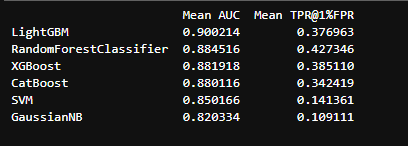

<h3>Test Results</h3>
<p>Next, we see how well these models fare on the held out test data. We are on the lookout for overfitting, undefitting, and other odd behavior in our results. Below were our results for the testing data</p>

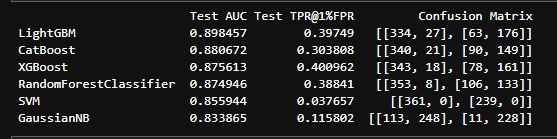

<p>For SVM: It simpyly predicts 0 for all the classes, which results in it have a TPR of 1 and an FPR of 1. Despite this, its AUC is still pretty good. According to ChatGPT:</p>
<p style="text-indent: 20px;">The SVM’s margin distances still vary across emails.</p>
<p style="text-indent: 20px;">Even though the decision boundary threshold (0) puts everything on one side, the ranking of samples may still separate spam and non-spam fairly well</p>
<p>For NaiveBayes: Its confusion matrix appears to be a bit better but on further calculations, it has a TPR of 0.313 and a FPR of 0.046, quite terrible </p>
<p>For the XGBoost, LightGBM, and CatBoost: These three models performed robustly on both the training and testing data, showing that tree based models are worth explroing (not all though, decision tree performs terribly)</p>
<p>According to ChatGPT, these are the reasons for their robustness</p>
<p style="text-indent: 20px;">LightGBM/XGBoost split on thresholds, so feature scaling or small drift barely affects performance.</p>
<p style="text-indent: 20px;">They automatically learn non-linear AND feature-crossing relationships.</p>
<p style="text-indent: 20px;">Gradient boosting trees handle -1 or imputed values gracefully.</p>
<p style="text-indent: 20px;">Their sigmoid calibration is often good enough for AUC/TPR@1%FPR metrics.</p>

<h3>Hyperparameter Tuning Results</h3>
<p>Since our best performing models are LightGBM, RandomForestClassifier, CatBoost, and XGBoost, we will only focus on tuning their hyperparameters</p>
<p>There is an optimization library known as Optuna that specializes in tuning Gradient Boosting models, so we will utilize it for our Gradient Boosting models. We will use RandomizedSearchCV for the non boosting models</p>
<p>The tuning of all of them was pretty swift except for CatBoost. I believe it took it a couple of hours (I ran it overnight).</p>
<p>Below are the best parameters for each:</p>
<p style="font-weight:500">XGBoost</p>

```python
xgb_params = {
    'booster': 'gbtree',
    'lambda': 2.291747136504949e-06,
    'alpha': 2.001229543085382e-06,
    'subsample': 0.8726203086510026,
    'colsample_bytree': 0.6359003258261658,
    'max_depth': 3,
    'eta': 0.07748868236998924,
    'gamma': 0.00016628953902927883,
    'min_child_weight': 4,
    'grow_policy': 'lossguide',
    'n_estimators': 500,
    'random_state': 42
}
```
<p style="font-weight:500">LightBGM</p>

```python
lightbgm_params = {
    'objective': 'binary',
    'metric': 'auc',
    'boosting_type': 'gbdt',
    'num_leaves': 66,
    'max_depth': 3,
    'learning_rate': 0.050199715062113674,
    'min_child_samples': 25,
    'subsample': 0.5626192183874275,
    'colsample_bytree': 0.7695965990568103,
    'lambda_l1': 0.16420137794083894,
    'lambda_l2': 7.949175936281098e-07,
    'min_split_gain': 0.8427003644214346,
    "verbose":-1,
    "random_state":42
}
```
<p style="font-weight:500">CatBoost</p>

```python
catboost_params = {
    'iterations': 500,
    'depth': 6,
    'learning_rate': 0.03928686220839349,
    'l2_leaf_reg': 0.6149408710293484,
    'border_count': 105,
    'random_strength': 1.1727426750911354e-06,
    'boosting_type': 'Ordered',
    'bootstrap_type': 'Bayesian',
    'bagging_temperature': 0.8122221718596306,
    'random_state':42
}
```

<p style="font-weight:500">Random Forest</p>

```python
randomforest_params = {
    'n_estimators': 100,
    'min_samples_split': 10,
    'min_samples_leaf': 1,
    'max_features': 'sqrt',
    'max_depth': 10,
    'bootstrap': False,
    "random_state":42
}

```

<p>Below are our new training results after hyperparameter tuning:</p>

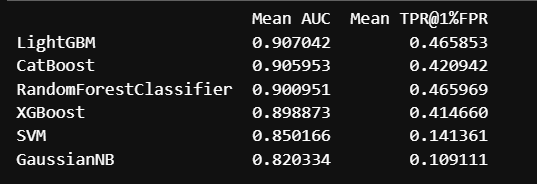

<p>Below are our new testing results after hyperparameter tuning:</p>
<p style="font-weight:500">NOTE: DO NOT HYPERPARAMETER TUNE BASED OFF TESTING RESULTS</p>

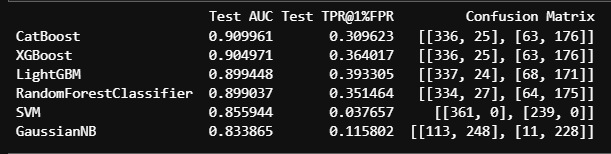

<h3>Next Plans</h3>
<p>The competitvie baseline has an AUC of 0.884 and a TPR at 1% FPR of 0.319</p>
<p>As of current, we only have 1 model that beats both the AUC and TPR of the competitive baseline but we do note that XGBoost has a really high TPR at 1% FPR</p>
<p>Instead of spending time on imputation methods, we should also consider feature selection, as there may be some features adding noise to our data that we could remove</p>
<p>We will then consider Ensembling a permutation of the 4 models, to see if we can reach even higher results</p>
<h4>NOTE: During these steps, we will evaluate our model performance simply on its increasing val AUC and TPR at 1% FPR. We will NOT use the test data to tweak parameters. When we are finally done, we will verify that our test has not significantly decreased and hopefully increased</h4>

In [71]:
X_test_cur

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.000,0.000000,0.000000,0.000000,0.001464,0.000000,0.009400,0.002233,0.001224,0.0000,...,0.000000,0.000631,0.000000,0.001200,0.000000,0.0,0.000000,0.000000,0.000882,0.009400
1,0.000,0.001058,0.000000,0.000000,0.001464,0.017500,0.001401,0.002233,0.001224,0.0000,...,0.000000,0.000631,0.000000,0.001828,0.000000,0.0,0.000000,0.000000,0.000000,0.002993
2,0.005,0.003500,0.000000,0.000000,0.000000,0.014400,0.000000,0.000000,0.000000,0.0000,...,0.001525,0.000000,0.005000,0.000000,0.001433,0.0,0.000000,0.000000,0.000000,0.000000
3,0.000,0.000000,0.000000,0.002962,0.000000,0.000972,0.001401,0.000000,0.000000,0.0000,...,0.000000,0.000631,0.000721,0.000000,0.000000,0.0,0.000000,0.000504,0.000882,0.000000
4,0.000,0.001058,0.000000,0.000000,0.001464,0.000972,0.000000,0.002233,0.000000,0.0042,...,0.000000,0.000631,0.000000,0.000000,0.000000,0.0,0.000958,0.000504,0.000882,0.002993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0.000,0.000000,0.000000,0.003600,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,...,0.001525,0.000000,0.000721,0.001828,0.000000,0.0,0.000000,0.000504,0.000900,0.002700
596,0.000,0.000000,0.000000,0.000000,0.000000,0.000100,0.000000,0.000000,0.001224,0.0000,...,0.001525,0.000000,0.000000,0.001828,0.000000,0.0,0.000000,0.000000,0.000000,0.002993
597,0.000,0.000000,0.000400,0.010400,0.001464,0.000972,0.000000,0.000000,0.000900,0.0009,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000958,0.000000,0.007900,0.001400
598,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004200,0.004200,0.004200,0.0000,...,0.001525,0.000000,0.000000,0.001828,0.000000,0.0,0.000000,0.004200,0.000000,0.000000


<h1>Testing</h1>

In [72]:
for name, model in models.items():
    
    model.fit(X_train_cur, y_train)
    
    # Some models output probabilities, some don't
    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_test_cur)[:, 1]
        y_scores_discrete = model.predict(X_test_cur)
    else:
        y_scores = model.decision_function(X_test_cur)
    
    
    results[name] = {
        "Test AUC":roc_auc_score(y_test, y_scores),
        "Test TPR@1%FPR": tpr_at_fpr(y_test, y_scores, fpr_target=0.01),
        "Confusion Matrix": confusion_matrix(y_test, y_scores_discrete)
    }
results

{'GaussianNB': {'Test AUC': np.float64(0.8279419093869888),
  'Test TPR@1%FPR': np.float64(0.1434937238493724),
  'Confusion Matrix': array([[119, 242],
         [ 14, 225]])},
 'LightGBM': {'Test AUC': np.float64(0.8993381935349274),
  'Test TPR@1%FPR': np.float64(0.41841004184100417),
  'Confusion Matrix': array([[333,  28],
         [ 64, 175]])},
 'SVM': {'Test AUC': np.float64(0.8504966446064511),
  'Test TPR@1%FPR': np.float64(0.04602510460251046),
  'Confusion Matrix': array([[361,   0],
         [239,   0]])},
 'CatBoost': {'Test AUC': np.float64(0.9023632633665203),
  'Test TPR@1%FPR': np.float64(0.41422594142259417),
  'Confusion Matrix': array([[335,  26],
         [ 61, 178]])},
 'XGBoost': {'Test AUC': np.float64(0.8974373833725473),
  'Test TPR@1%FPR': np.float64(0.3723849372384937),
  'Confusion Matrix': array([[337,  24],
         [ 61, 178]])},
 'RandomForestClassifier': {'Test AUC': np.float64(0.8853255137403077),
  'Test TPR@1%FPR': np.float64(0.4560669456066946),
  

In [73]:
df_results = pd.DataFrame(results).T.sort_values(by="Test AUC", ascending=False)
print(df_results)

                        Test AUC Test TPR@1%FPR         Confusion Matrix
CatBoost                0.902363       0.414226   [[335, 26], [61, 178]]
LightGBM                0.899338        0.41841   [[333, 28], [64, 175]]
XGBoost                 0.897437       0.372385   [[337, 24], [61, 178]]
RandomForestClassifier  0.885326       0.456067   [[337, 24], [72, 167]]
SVM                     0.850497       0.046025     [[361, 0], [239, 0]]
GaussianNB              0.827942       0.143494  [[119, 242], [14, 225]]


In [74]:
X_test_median_imputation

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.000,0.0000,0.0000,0.0000,0.0,0.0000,0.0094,0.0000,0.0000,0.0000,...,0.0,0.0,0.000,0.0012,0.0,0.0,0.0,0.0000,0.0000,0.0094
1,0.000,0.0000,0.0000,0.0000,0.0,0.0175,0.0000,0.0000,0.0000,0.0000,...,0.0,0.0,0.000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0000
2,0.005,0.0035,0.0000,0.0000,0.0,0.0144,0.0000,0.0000,0.0000,0.0000,...,0.0,0.0,0.005,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0000
3,0.000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0,0.0,0.000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0000
4,0.000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0042,...,0.0,0.0,0.000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0.000,0.0000,0.0000,0.0036,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0,0.0,0.000,0.0000,0.0,0.0,0.0,0.0000,0.0009,0.0027
596,0.000,0.0000,0.0000,0.0000,0.0,0.0001,0.0000,0.0000,0.0000,0.0000,...,0.0,0.0,0.000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0000
597,0.000,0.0000,0.0004,0.0104,0.0,0.0000,0.0000,0.0000,0.0009,0.0009,...,0.0,0.0,0.000,0.0000,0.0,0.0,0.0,0.0000,0.0079,0.0014
598,0.000,0.0000,0.0000,0.0000,0.0,0.0000,0.0042,0.0042,0.0042,0.0000,...,0.0,0.0,0.000,0.0000,0.0,0.0,0.0,0.0042,0.0000,0.0000


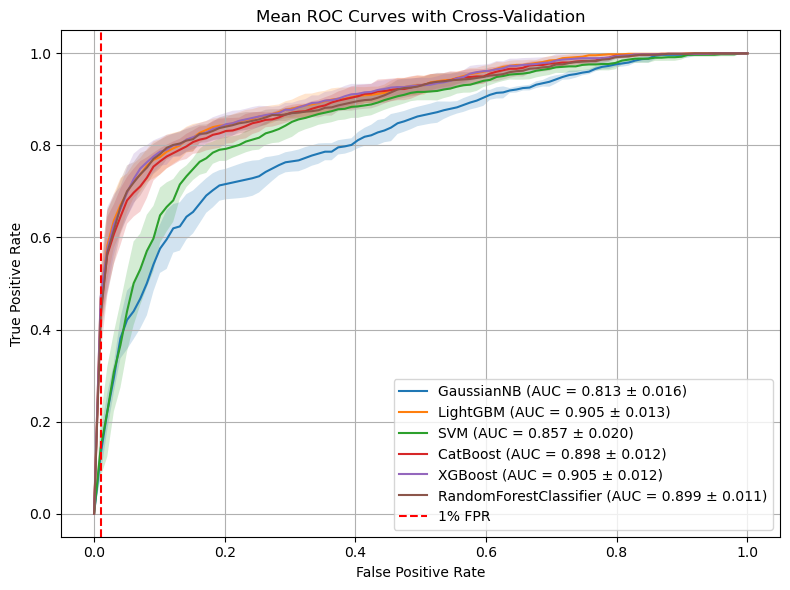

In [75]:
def plot_mean_roc(model, X, y, n_splits=5, label=None):
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    mean_fpr = np.linspace(0, 1, 100)
    tprs = []
    aucs = []

    for train_idx, val_idx in cv.split(X, y):
        model.fit(X.iloc[train_idx], y.iloc[train_idx])
        
        if hasattr(model, "predict_proba"):
            y_score = model.predict_proba(X.iloc[val_idx])[:, 1]
        else:
            y_score = model.decision_function(X.iloc[val_idx])
            
        fpr, tpr, _ = roc_curve(y.iloc[val_idx], y_score)
        tprs.append(np.interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        fold_auc = auc(fpr, tpr)
        aucs.append(fold_auc)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = np.mean(aucs)
    std_auc = np.std(aucs)
    
    plt.plot(mean_fpr, mean_tpr, label=f"{label} (AUC = {mean_auc:.3f} ± {std_auc:.3f})")
    plt.fill_between(mean_fpr,
                     np.maximum(mean_tpr - np.std(tprs, axis=0), 0),
                     np.minimum(mean_tpr + np.std(tprs, axis=0), 1),
                     alpha=0.2)

plt.figure(figsize=(8, 6))

for name, model in models.items():
    plot_mean_roc(model, X_train_cur, y_train, label=name)

plt.axvline(x=0.01, color='red', linestyle='--', label='1% FPR')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Mean ROC Curves with Cross-Validation")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


Test set AUC: 0.8887618111681548
TPR at FPR = 0.01: 0.3647469458987784


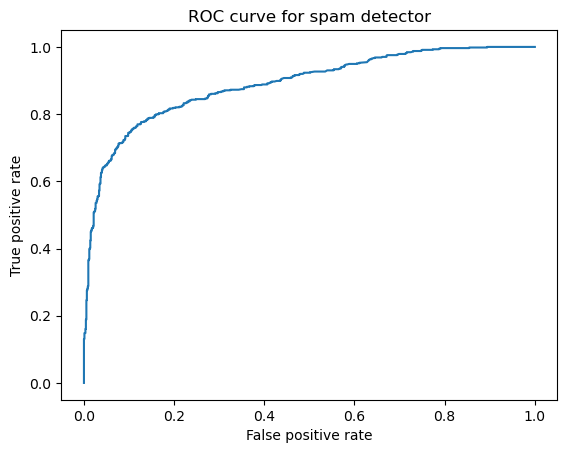

In [76]:
# -*- coding: utf-8 -*-
"""
Script used to evaluate classifier accuracy
@author: Kevin S. Xu
"""
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.impute import KNNImputer,SimpleImputer
import pandas as pd 
from sklearn.svm import SVC

desiredFPR = 0.01
trainDataFilename = 'spamTrain1.csv'
testDataFilename = 'spamTrain2.csv'

def tprAtFPR(labels,outputs,desiredFPR):
    fpr,tpr,thres = roc_curve(labels,outputs)
    # True positive rate for highest false positive rate < 0.01
    maxFprIndex = np.where(fpr<=desiredFPR)[0][-1]
    fprBelow = fpr[maxFprIndex]
    fprAbove = fpr[maxFprIndex+1]
    # Find TPR at exactly desired FPR by linear interpolation
    tprBelow = tpr[maxFprIndex]
    tprAbove = tpr[maxFprIndex+1]
    tprAt = ((tprAbove-tprBelow)/(fprAbove-fprBelow)*(desiredFPR-fprBelow)
    + tprBelow)
    return tprAt,fpr,tpr
    
def predictTest(trainFeatures,trainLabels,testFeatures):

    model = lgb.LGBMClassifier(**lightbgm_params) #CatBoostClassifier(**catboost_params), xgb.XGBClassifier(**xgb_params)

    model.fit(trainFeatures,trainLabels)
    # Use predict_proba() rather than predict() to use probabilities rather
    # than estimated class labels as outputs
    testOutputs = model.predict_proba(testFeatures)[:,1]
    return testOutputs

trainData = np.loadtxt(trainDataFilename,delimiter=',')
testData = np.loadtxt(testDataFilename,delimiter=',')


# Separate labels (last column) from training and test data
trainFeatures = trainData[:,:-1]
trainLabels = trainData[:,-1]
testFeatures = testData[:,:-1]
testLabels = testData[:,-1]

median_imputer = SimpleImputer(strategy='mean', missing_values=-1)
X_train_imputation = pd.DataFrame(median_imputer.fit_transform(pd.DataFrame(trainFeatures)),
                                         columns=pd.DataFrame(trainFeatures).columns)
X_test_imputation = pd.DataFrame(median_imputer.transform(pd.DataFrame(testFeatures)),
                                       columns=pd.DataFrame(testFeatures).columns)

testOutputs = predictTest(X_train_imputation[selected_features],trainLabels,X_test_imputation[selected_features])
aucTestRun = roc_auc_score(testLabels,testOutputs)
tprAtDesiredFPR,fpr,tpr = tprAtFPR(testLabels,testOutputs,desiredFPR)
plt.plot(fpr,tpr)
print(f'Test set AUC: {aucTestRun}')
print(f'TPR at FPR = {desiredFPR}: {tprAtDesiredFPR}')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for spam detector')
plt.show()


10-fold cross-validation mean AUC:  0.8216676855824521
Test set AUC:  0.801125554850983


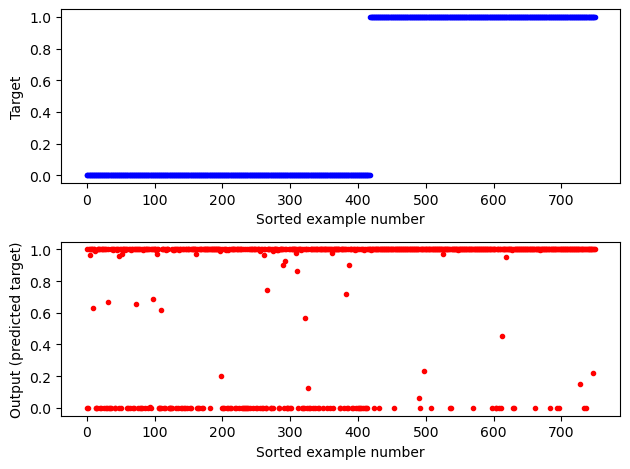

In [77]:
# -*- coding: utf-8 -*-
"""
Demo of 10-fold cross-validation using Gaussian naive Bayes on spam data
@author: Kevin S. Xu
"""
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
def aucCV(features,labels):
    # model = GaussianNB()
    model = make_pipeline(SimpleImputer(missing_values=-1, strategy='mean'),
    GaussianNB())
    scores = cross_val_score(model,features,labels,cv=10,scoring='roc_auc')
    return scores
def predictTest(trainFeatures,trainLabels,testFeatures):
    # model = GaussianNB()
    model = make_pipeline(SimpleImputer(missing_values=-1, strategy='mean'),
    GaussianNB())
    model.fit(trainFeatures,trainLabels)
    # Use predict_proba() rather than predict() to use probabilities rather
    # than estimated class labels as outputs
    testOutputs = model.predict_proba(testFeatures)[:,1]
    return testOutputs

    
# Run this code only if being used as a script, not being imported
if __name__ == "__main__":
    data = np.loadtxt('spamTrain1.csv',delimiter=',')
    # Separate labels (last column)
    features = data[:,:-1]
    labels = data[:,-1]
    # Evaluating classifier accuracy using 10-fold cross-validation
    print("10-fold cross-validation mean AUC: ",
    np.mean(aucCV(features,labels)))
    # Arbitrarily choose all odd samples as train set and all even as test set
    # then compute test set AUC for model trained only on fixed train set
    trainFeatures = features[0::2,:]
    trainLabels = labels[0::2]
    testFeatures = features[1::2,:]
    testLabels = labels[1::2]
    testOutputs = predictTest(trainFeatures,trainLabels,testFeatures)
    print("Test set AUC: ", roc_auc_score(testLabels,testOutputs))
    # Examine outputs compared to labels
    sortIndex = np.argsort(testLabels)
    nTestExamples = testLabels.size
    plt.subplot(2,1,1)
    plt.plot(np.arange(nTestExamples),testLabels[sortIndex],'b.')
    plt.xlabel('Sorted example number')
    plt.ylabel('Target')
    plt.subplot(2,1,2)
    plt.plot(np.arange(nTestExamples),testOutputs[sortIndex],'r.')
    plt.xlabel('Sorted example number')
    plt.ylabel('Output (predicted target)')
    plt.tight_layout()
    plt.show()


Test set AUC: 0.8323834543352772
TPR at FPR = 0.01: 0.12267310789049919


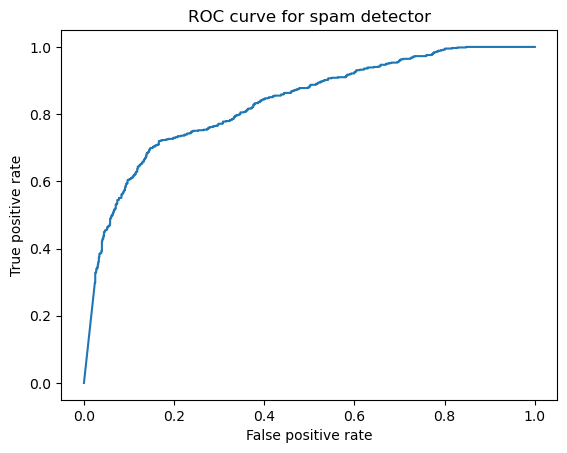

In [78]:
# -*- coding: utf-8 -*-
"""
Script used to evaluate classifier accuracy
@author: Kevin S. Xu
"""
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score,roc_curve
#from classifySpam import predictTest
desiredFPR = 0.01
trainDataFilename = 'spamTrain1.csv'
testDataFilename = 'spamTrain1.csv'
#testDataFilename = 'spamTest.csv'
def tprAtFPR(labels,outputs,desiredFPR):
    fpr,tpr,thres = roc_curve(labels,outputs)
    # True positive rate for highest false positive rate < 0.01
    maxFprIndex = np.where(fpr<=desiredFPR)[0][-1]
    fprBelow = fpr[maxFprIndex]
    fprAbove = fpr[maxFprIndex+1]
    # Find TPR at exactly desired FPR by linear interpolation
    tprBelow = tpr[maxFprIndex]
    tprAbove = tpr[maxFprIndex+1]
    tprAt = ((tprAbove-tprBelow)/(fprAbove-fprBelow)*(desiredFPR-fprBelow)
    + tprBelow)
    return tprAt,fpr,tpr
trainData = np.loadtxt(trainDataFilename,delimiter=',')
testData = np.loadtxt(testDataFilename,delimiter=',')
# Separate labels (last column) from training and test data
trainFeatures = trainData[:,:-1]
trainLabels = trainData[:,-1]
testFeatures = testData[:,:-1]
testLabels = testData[:,-1]
testOutputs = predictTest(trainFeatures,trainLabels,testFeatures)
aucTestRun = roc_auc_score(testLabels,testOutputs)
tprAtDesiredFPR,fpr,tpr = tprAtFPR(testLabels,testOutputs,desiredFPR)
plt.plot(fpr,tpr)
print(f'Test set AUC: {aucTestRun}')
print(f'TPR at FPR = {desiredFPR}: {tprAtDesiredFPR}')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for spam detector')
plt.show()